# Exploratory Data Analysis - Credit Assignment

## Starting with application_data.csv dataset

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
apl_df = pd.read_csv('application_data.csv')
apl_df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [4]:
apl_df.shape

(307511, 122)

# STEP-1: Data cleaning and Imputing missing values

1. looking at the data, first we need to clean the 'NAME_EDUCATION_TYPE' column

In [5]:
apl_df['NAME_EDUCATION_TYPE'].describe()

count                            307511
unique                                5
top       Secondary / secondary special
freq                             218391
Name: NAME_EDUCATION_TYPE, dtype: object

In [6]:
apl_df['Education type'] = apl_df['NAME_EDUCATION_TYPE'].apply(lambda x: x.split('/')[1] if "Secondary" in x else x)

In [7]:
apl_df.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0        121500.000    513000.0      21865.5   
5                Y             0         99000.000    490495.5      27517.5   
6                Y             1        171000.000   1560726.0      41301.0   
7                Y             0        360000.000   1530000.0      42075.0   
8                Y             0        112500.000   1019610.0      33826.5   
9                Y             0        135000.000    405000.0      20250.0   
10               Y             1        112500.000    652500.0      21177.0   
11               Y             0         38419.155    148365.0      10678.5   
12               Y             0         67500.000     80865.0       5881.5   
13               N             1        225000.000    918468.0      28966.5   
14               Y             0        189000.000    773680.5      32778.0   
15               Y             0        157500.000    299772.0      20160.0   
16               N             0        108000.000    509602.5      26149.5   
17               Y             1         81000.000    270000.0      13500.0   
18               Y             0        112500.000    157500.0       7875.0   
19               Y             1         90000.000    544491.0      17563.5   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0    Unaccompanied               Working   
1         1129500.0           Family         State servant   
2          135000.0    Unaccompanied               Working   
3          297000.0    Unaccompanied               Working   
4          513000.0    Unaccompanied               Working   
5          454500.0  Spouse, partner         State servant   
6         1395000.0    Unaccompanied  Commercial associate   
7         1530000.0    Unaccompanied         State servant   
8          913500.0         Children             Pensioner   
9          405000.0    Unaccompanied               Working   
10         652500.0    Unaccompanied               Working   
11         135000.0         Children             Pensioner   
12          67500.0    Unaccompanied               Working   
13   

In [8]:
# dropping "NAME_EDUCATION_TYPE" column
apl_df.drop('NAME_EDUCATION_TYPE', axis=1, inplace=True)

In [9]:
apl_df['Education type'].isna().sum()

0

2. now let's clean the 'NAME_FAMILY_STATUS' column and get a new column call "Family_info": 

In [10]:
apl_df["Family_info"] = apl_df['NAME_FAMILY_STATUS'].apply(lambda x: "Un-Married" if "Single" in x else x)

In [11]:
apl_df.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0        121500.000    513000.0      21865.5   
5                Y             0         99000.000    490495.5      27517.5   
6                Y             1        171000.000   1560726.0      41301.0   
7                Y             0        360000.000   1530000.0      42075.0   
8                Y             0        112500.000   1019610.0      33826.5   
9                Y             0        135000.000    405000.0      20250.0   
10               Y             1        112500.000    652500.0      21177.0   
11               Y             0         38419.155    148365.0      10678.5   
12               Y             0         67500.000     80865.0       5881.5   
13               N             1        225000.000    918468.0      28966.5   
14               Y             0        189000.000    773680.5      32778.0   
15               Y             0        157500.000    299772.0      20160.0   
16               N             0        108000.000    509602.5      26149.5   
17               Y             1         81000.000    270000.0      13500.0   
18               Y             0        112500.000    157500.0       7875.0   
19               Y             1         90000.000    544491.0      17563.5   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0    Unaccompanied               Working   
1         1129500.0           Family         State servant   
2          135000.0    Unaccompanied               Working   
3          297000.0    Unaccompanied               Working   
4          513000.0    Unaccompanied               Working   
5          454500.0  Spouse, partner         State servant   
6         1395000.0    Unaccompanied  Commercial associate   
7         1530000.0    Unaccompanied         State servant   
8          913500.0         Children             Pensioner   
9          405000.0    Unaccompanied               Working   
10         652500.0    Unaccompanied               Working   
11         135000.0         Children             Pensioner   
12          67500.0    Unaccompanied               Working   
13   

In [12]:
# dropping "NAME_FAMILY_STATUS" column
apl_df.drop('NAME_FAMILY_STATUS', axis=1, inplace=True)

In [13]:
apl_df['Family_info'].isna().sum()

0

3. Now lets have a look at the "NAME_HOUSING_TYPE" column:

In [14]:
apl_df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [15]:
apl_df["Housing_type"] = apl_df['NAME_HOUSING_TYPE'].apply(lambda x: "Own-home" if "House" in x else x)

In [16]:
apl_df.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0        121500.000    513000.0      21865.5   
5                Y             0         99000.000    490495.5      27517.5   
6                Y             1        171000.000   1560726.0      41301.0   
7                Y             0        360000.000   1530000.0      42075.0   
8                Y             0        112500.000   1019610.0      33826.5   
9                Y             0        135000.000    405000.0      20250.0   
10               Y             1        112500.000    652500.0      21177.0   
11               Y             0         38419.155    148365.0      10678.5   
12               Y             0         67500.000     80865.0       5881.5   
13               N             1        225000.000    918468.0      28966.5   
14               Y             0        189000.000    773680.5      32778.0   
15               Y             0        157500.000    299772.0      20160.0   
16               N             0        108000.000    509602.5      26149.5   
17               Y             1         81000.000    270000.0      13500.0   
18               Y             0        112500.000    157500.0       7875.0   
19               Y             1         90000.000    544491.0      17563.5   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  NAME_HOUSING_TYPE  \
0          351000.0    Unaccompanied               Working  House / apartment   
1         1129500.0           Family         State servant  House / apartment   
2          135000.0    Unaccompanied               Working  House / apartment   
3          297000.0    Unaccompanied               Working  House / apartment   
4          513000.0    Unaccompanied               Working  House / apartment   
5          454500.0  Spouse, partner         State servant  House / apartment   
6         1395000.0    Unaccompanied  Commercial associate  House / apartment   
7         1530000.0    Unaccompanied         State servant  House / apartment   
8          913500.0         Children             Pensioner  House / apartment   
9          405000.0    Unaccompanied               Working  Hou

In [17]:
# dropping "NAME_HOUSING_TYPE" column
apl_df.drop('NAME_HOUSING_TYPE', axis=1, inplace=True)

In [18]:
apl_df['Housing_type'].isna().sum()

0

In [19]:
apl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4             

In [20]:
def null_perc(df):
    return ((df.isnull().sum()/len(df))*100)
df_null_perc = null_perc(apl_df)
df_null_perc

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0.000000
FLAG_PHONE                       0

As suggested in the description, dropping all columns having more than 50% of null values

In [21]:
apl_df.info(verbose=True) # to display the d-types of all the columns along with their indices which may be usefull for dropping multiple columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   REGION_POPULATION_RELATIVE    float64
 14   DAYS_BIRTH                    int64  
 15   DAYS_EMPLOYED                 int64  
 16   DAYS_REGISTRATION             float64
 17   DAYS_ID_PUBLISH               int64  
 18   OW

In [22]:
drop_col = [col for col in apl_df.columns if null_perc(apl_df[col]) > 50]
drop_col

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [23]:
len(drop_col)

41

In [24]:
apl_df.drop(drop_col, axis=1, inplace=True)
apl_df.shape

(307511, 81)

In [25]:
apl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_C

### NOTE:
The 4 'DAYS-' columns i.e. DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH cannot be negative, hence we need to change them to positive values. Now, I am performing this step.

We can directly perform this step as these columns have no null values as checked from cell 20.

In [26]:
apl_df['DAYS_BIRTH'] = apl_df['DAYS_BIRTH'].apply(lambda x: -1*x)

In [27]:
apl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   
2                    0.010032       19046           -225            -4260.0   
3                    0.008019       19005          -3039            -9833.0   
4                    0.028663       19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_C

In [28]:
apl_df['DAYS_EMPLOYED'] = apl_df['DAYS_EMPLOYED'].apply(lambda x: abs(x))
apl_df['DAYS_REGISTRATION'] = apl_df['DAYS_REGISTRATION'].apply(lambda x: abs(x))
apl_df['DAYS_ID_PUBLISH'] = apl_df['DAYS_ID_PUBLISH'].apply(lambda x: abs(x))
apl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_C

In [29]:
df_null_perc = null_perc(apl_df)
df_null_perc

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0.000000
FLAG_PHONE                       0.000000
FLAG_EMAIL                       0

some of the columns have close to 50% null values. let us check the relationship of these attributes with the TARGET variable and see whether these can be dropped or not!

The columns in question are the following:

YEARS_BEGINEXPLUATATION_AVG   -  48.781019

FLOORSMAX_AVG                  - 49.760822

YEARS_BEGINEXPLUATATION_MODE   -  48.781019

FLOORSMAX_MODE                 - 49.760822

YEARS_BEGINEXPLUATATION_MEDI   - 48.781019

FLOORSMAX_MEDI                 - 49.760822

TOTALAREA_MODE                 - 48.268517

EMERGENCYSTATE_MODE            - 47.398304

/var/folders/c3/r27yfd7j7ds01zbgv2ks9v1h0000gn/T/ipykernel_32891/4082324491.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(apl_df[temp+['TARGET']].corr(), cmap="Reds", annot=True)


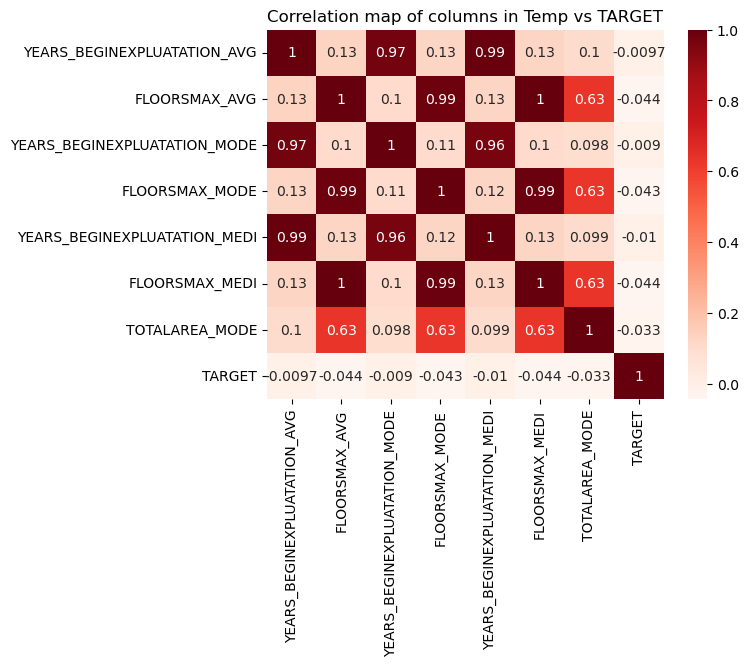

In [30]:
temp = ['YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE']
sns.heatmap(apl_df[temp+['TARGET']].corr(), cmap="Reds", annot=True)
plt.title("Correlation map of columns in Temp vs TARGET")
plt.show()

### NOTE:
The above correlation plot shows that the 8 columns have an non-linear relationship with the Target variable, and hence, even if we impute the missing values in these columns, they will not effect the TARGET value. hence these can be dropped comfortably.

In [31]:
## Dropping the above 8 columns with nearly 50% null values
apl_df.drop(temp, axis=1, inplace=True)

In [32]:
apl_df.shape

(307511, 73)

In [33]:
df_null_perc = null_perc(apl_df)
df_null_perc

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE 

OCCUPATION_TYPE has nearly 31.345% null values, let's see what can be done with the column

In [34]:
apl_df['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

OCCUPATION_TYPE may be a significant factor when it comes to TARGET variable so we cannot drop it. but we can replace the missing values with something like "Unknown" as it is a Categorical variable.  

In [35]:
apl_df['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)

In [36]:
apl_df['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Unknown                  31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

now let us see the effect of EXT_SOURCE_3 having 19.825307% null values. Also, I am going to see the effect of  EXT_SOURCE_2 on the TARGET variable. Seeing the data, these two are normalized scores from external data sources and may or may not be Trust worthy.

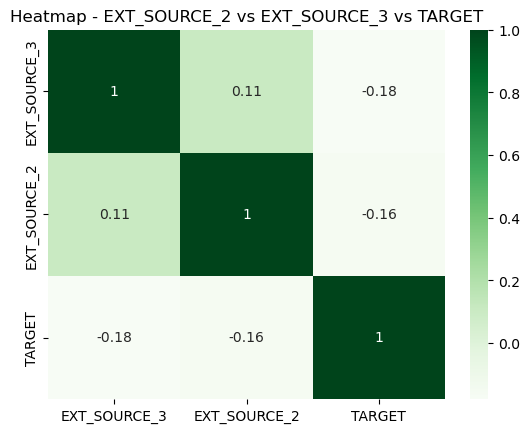

In [37]:
temp = ['EXT_SOURCE_3', 'EXT_SOURCE_2']
# I will try to see the correlation of these two parameters with TARGET variable using a heatmap
sns.heatmap(apl_df[temp+['TARGET']].corr(), annot=True, cmap="Greens")
plt.title("Heatmap - EXT_SOURCE_2 vs EXT_SOURCE_3 vs TARGET")
plt.show()

### NOTE:
these two columns also clearly have a non-linear relation with TARGET variable and hence I feel these have little to no effect on the TARGET variable. and hence, I am dropping these columns

In [38]:
# dropping the two columns
apl_df.drop(temp, axis=1, inplace=True)
apl_df.shape

(307511, 71)

Now we check the 'FLAG-' columns data and their effect on TARGET variable

In [39]:
flags = [colm for colm in apl_df.columns if "FLAG" in colm]
len(flags)

28

In [40]:
flags_tar_df = apl_df[flags+['TARGET']]
flags_tar_df.head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  TARGET  
0                 0                 0       1  
1                 0                 0       0  
2                 0                 0       0  
3                 0                 0       0  
4                 0                 0       0

In [41]:
flags_tar_df['TARGET'] = flags_tar_df['TARGET'].replace({1:"Defaulter",0:"Re-payer"})

/var/folders/c3/r27yfd7j7ds01zbgv2ks9v1h0000gn/T/ipykernel_32891/3431659917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flags_tar_df['TARGET'] = flags_tar_df['TARGET'].replace({1:"Defaulter",0:"Re-payer"})


In [42]:
# replacing 1's and 0's in all columns except TARGET column with Y and N respectively
for i in flags_tar_df:
    if i!="TARGET":
        flags_tar_df[i] = flags_tar_df[i].replace({1:'Y', 0:'N'})
flags_tar_df.head()

/var/folders/c3/r27yfd7j7ds01zbgv2ks9v1h0000gn/T/ipykernel_32891/1180700848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flags_tar_df[i] = flags_tar_df[i].replace({1:'Y', 0:'N'})


FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0            N               Y          Y              Y               N   
1            N               N          Y              Y               N   
2            Y               Y          Y              Y               Y   
3            N               Y          Y              Y               N   
4            N               Y          Y              Y               N   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  \
0                Y          Y          N               N               Y   
1                Y          Y          N               N               Y   
2                Y          Y          N               N               N   
3                Y          N          N               N               Y   
4                Y          N          N               N               N   

  FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7  \
0               N               N               N               N   
1               N               N               N               N   
2               N               N               N               N   
3               N               N               N               N   
4               N               N               N               N   

  FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11  \
0               N               N                N                N   
1               N               N                N                N   
2               N               N                N                N   
3               N               N                N                N   
4               Y               N                N                N   

  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21     TARGET  
0                N                N  Defaulter  
1                N                N   Re-payer  
2                N                N   Re-payer  
3                N                N   Re-payer  
4                N                N   Re-payer

Text(0.5, 1.0, 'FLAG_EMAIL')

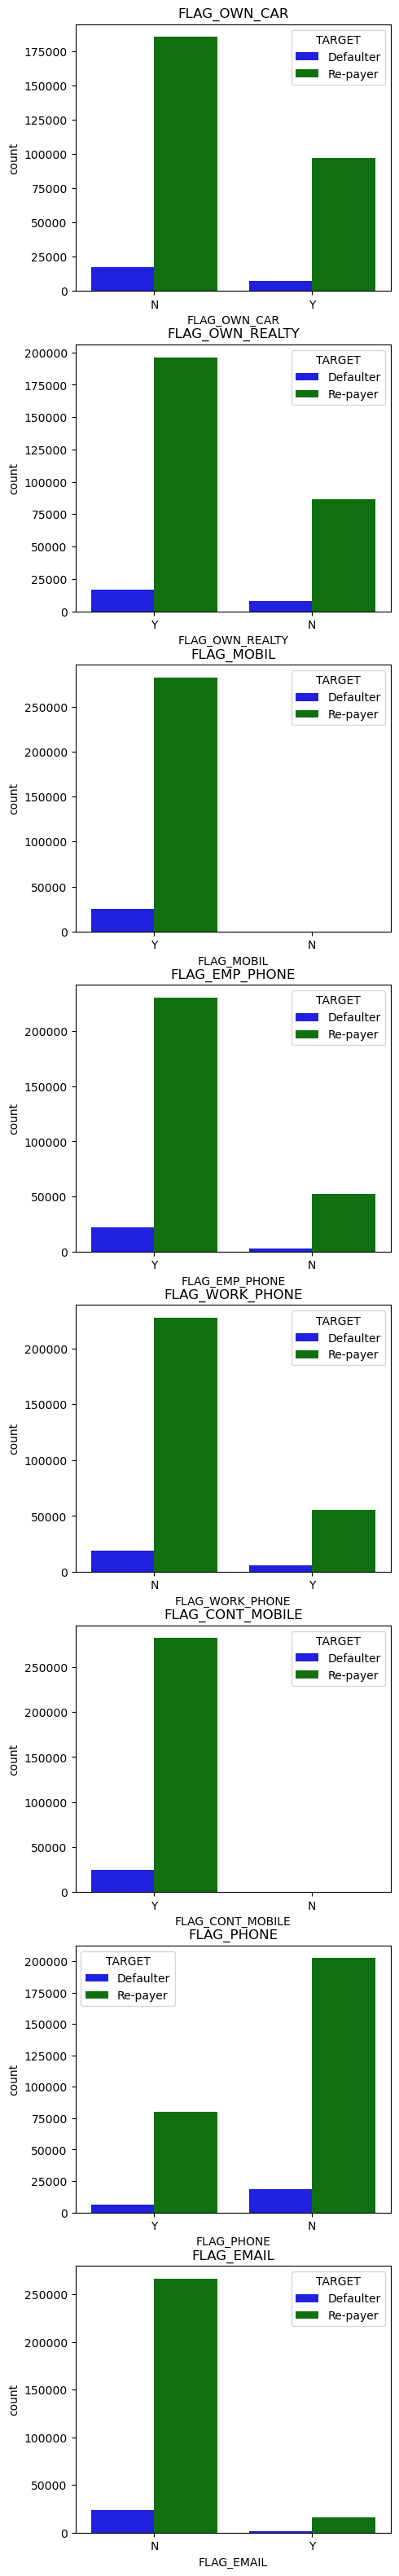

In [43]:
plt.figure(figsize=[5,40])
plt.subplot(8,1,1)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_OWN_CAR'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_OWN_CAR')
plt.subplot(8,1,2)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_OWN_REALTY'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_OWN_REALTY')
plt.subplot(8,1,3)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_MOBIL'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_MOBIL')
plt.subplot(8,1,4)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_EMP_PHONE'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_EMP_PHONE')
plt.subplot(8,1,5)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_WORK_PHONE'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_WORK_PHONE')
plt.subplot(8,1,6)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_CONT_MOBILE'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_CONT_MOBILE')
plt.subplot(8,1,7)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_PHONE'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_PHONE')
plt.subplot(8,1,8)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_EMAIL'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_EMAIL')


Text(0.5, 1.0, 'FLAG_DOCUMENT_21')

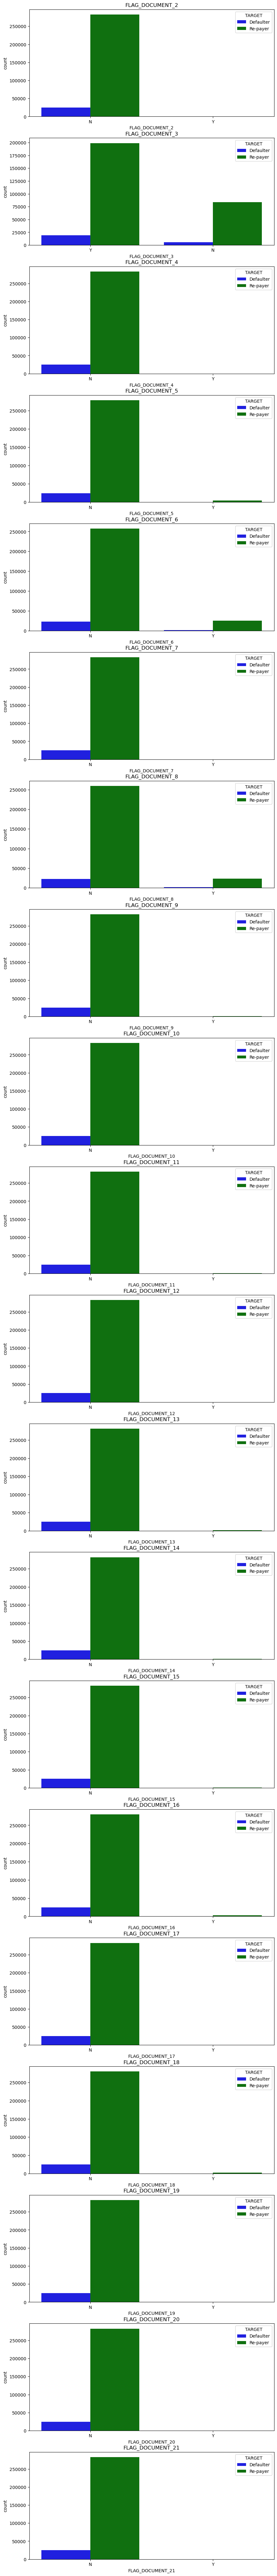

In [44]:
plt.figure(figsize=[10,105])
plt.subplot(20,1,1)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_2'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_2')
plt.subplot(20,1,2)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_3'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_3')
plt.subplot(20,1,3)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_4'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_4')
plt.subplot(20,1,4)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_5'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_5')
plt.subplot(20,1,5)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_6'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_6')
plt.subplot(20,1,6)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_7'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_7')
plt.subplot(20,1,7)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_8'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_8')
plt.subplot(20,1,8)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_9'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_9')
plt.subplot(20,1,9)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_10'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_10')
plt.subplot(20,1,10)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_11'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_11')
plt.subplot(20,1,11)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_12'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_12')
plt.subplot(20,1,12)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_13'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_13')
plt.subplot(20,1,13)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_14'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_14')
plt.subplot(20,1,14)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_15'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_15')
plt.subplot(20,1,15)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_16'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_16')
plt.subplot(20,1,16)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_17'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_17')
plt.subplot(20,1,17)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_18'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_18')
plt.subplot(20,1,18)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_19'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_19')
plt.subplot(20,1,19)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_20'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_20')
plt.subplot(20,1,20)
ax1 = sns.countplot(data=flags_tar_df, x=flags_tar_df['FLAG_DOCUMENT_21'], hue=flags_tar_df['TARGET'], palette = ['b','g'], orient='v')
plt.title('FLAG_DOCUMENT_21')

### NOTE:
Observations from above plots: 
FLAG_OWN_REALTY, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_CONT_MOBIL, FLAG_DOCUMENT_3 for 'Y' has more re-payers than defaulters. i.e., applicants 

1. applicants having own house/flat have been re-payers than defaulters.
2. applicants who provided mobile number have more re-payers than defaulters.
3. applicants whose phones are reachable easily are re-payers than defaulters.
4. applicants who provided Document-3 are likely to be re-payers than defaulters

In [45]:
flags_tar_df.drop(['FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_DOCUMENT_3', 'TARGET'], axis=1, inplace=True)
# here, we dropped the columns that we want to keep from flags_tar_df and remaining columns will be dropped from apl_df dataframe. this will make the process hassle free

/var/folders/c3/r27yfd7j7ds01zbgv2ks9v1h0000gn/T/ipykernel_32891/2447087594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flags_tar_df.drop(['FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_DOCUMENT_3', 'TARGET'], axis=1, inplace=True)


In [46]:
apl_df.drop(flags_tar_df.columns, axis=1, inplace=True)

In [47]:
apl_df.shape

(307511, 47)

now lets focus on 6 other columns:

-AMT_REQ_CREDIT_BUREAU_HOUR     
-AMT_REQ_CREDIT_BUREAU_DAY      
-AMT_REQ_CREDIT_BUREAU_WEEK     
-AMT_REQ_CREDIT_BUREAU_MON     
-AMT_REQ_CREDIT_BUREAU_QRT      
-AMT_REQ_CREDIT_BUREAU_YEAR

In [48]:
apl_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [49]:
apl_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

### NOTE:
these 6 columns contain the count of the number of times the Bureau has been contacted regarding the applicant information, these are pure integer values and hence cannot be imputed using mean. hence, we need to use median to impute the null values. 

As said in the desription, I am not imputing the missing values and leaving them as it is.

In [50]:
apl_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
  

In [51]:
# checking null value % again
null_perc(apl_df)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
OCCUPATION_TYPE                 0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCES

In [52]:
apl_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
  

studying all numerical columns i.e 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
'AMT_ANNUITY', 'AMT_GOODS_PRICE' for any outliers

In [53]:
apl_df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

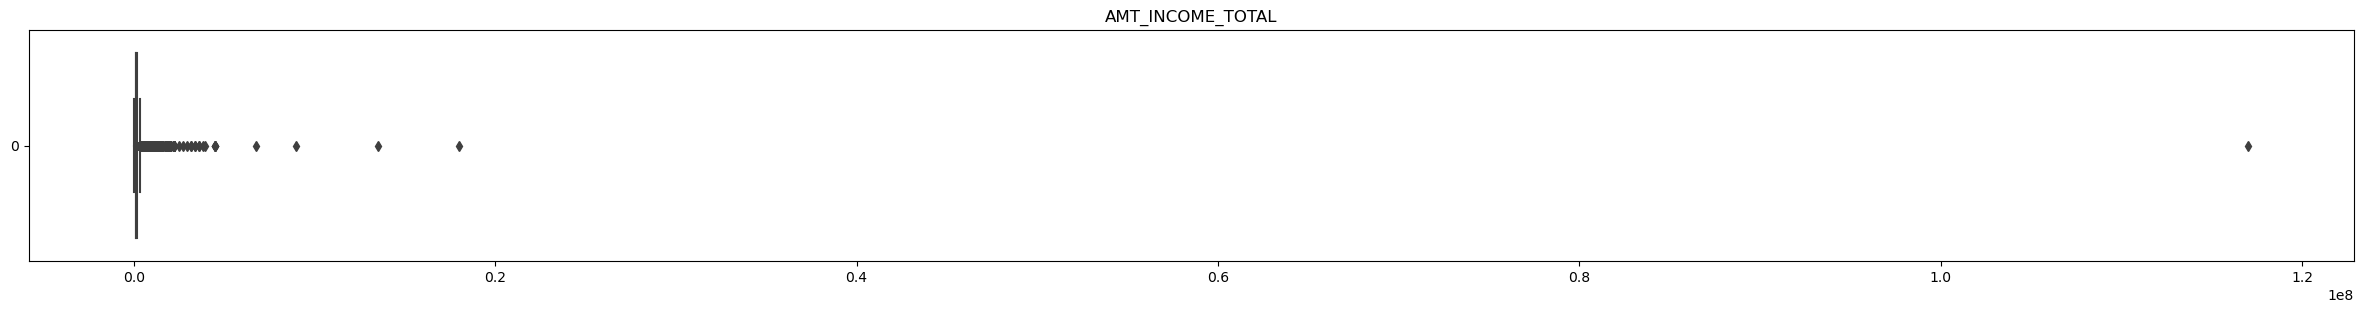

In [54]:
plt.figure(figsize=[30,3])
sns.boxplot(apl_df['AMT_INCOME_TOTAL'], orient='h')
plt.title('AMT_INCOME_TOTAL')
plt.show()

In [55]:
apl_df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

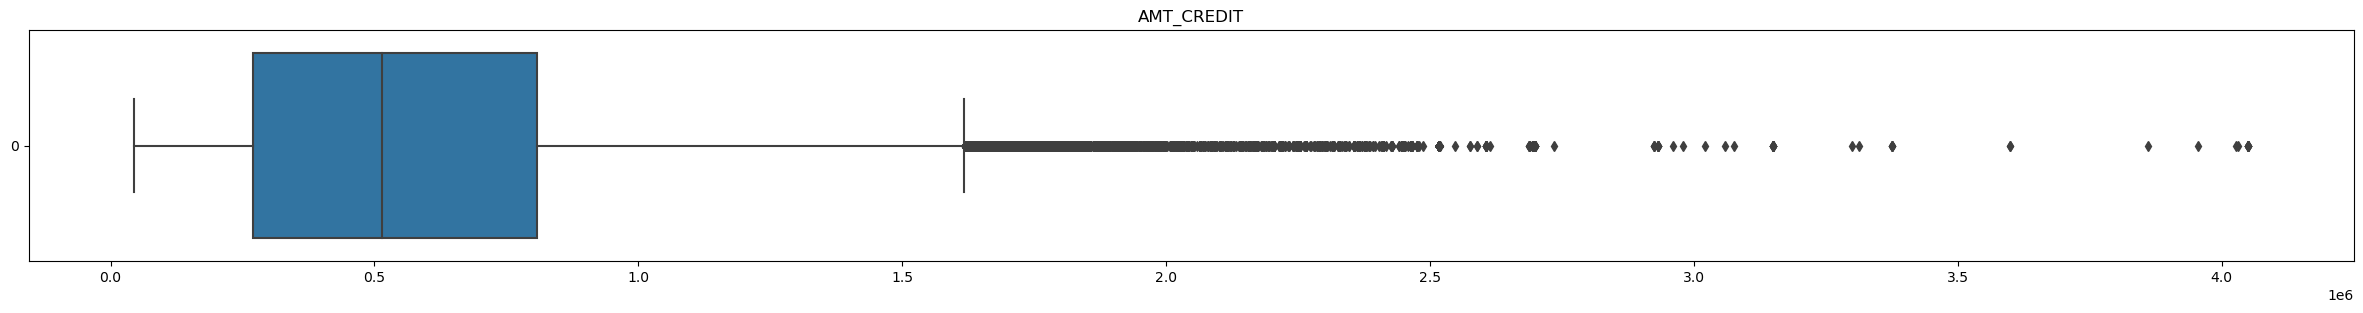

In [56]:
plt.figure(figsize=[30,3])
sns.boxplot(apl_df['AMT_CREDIT'], orient='h')
plt.title('AMT_CREDIT')
plt.show()

In [57]:
apl_df[['AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe()

AMT_ANNUITY  AMT_GOODS_PRICE
count  307499.000000     3.072330e+05
mean    27108.573909     5.383962e+05
std     14493.737315     3.694465e+05
min      1615.500000     4.050000e+04
25%     16524.000000     2.385000e+05
50%     24903.000000     4.500000e+05
75%     34596.000000     6.795000e+05
max    258025.500000     4.050000e+06

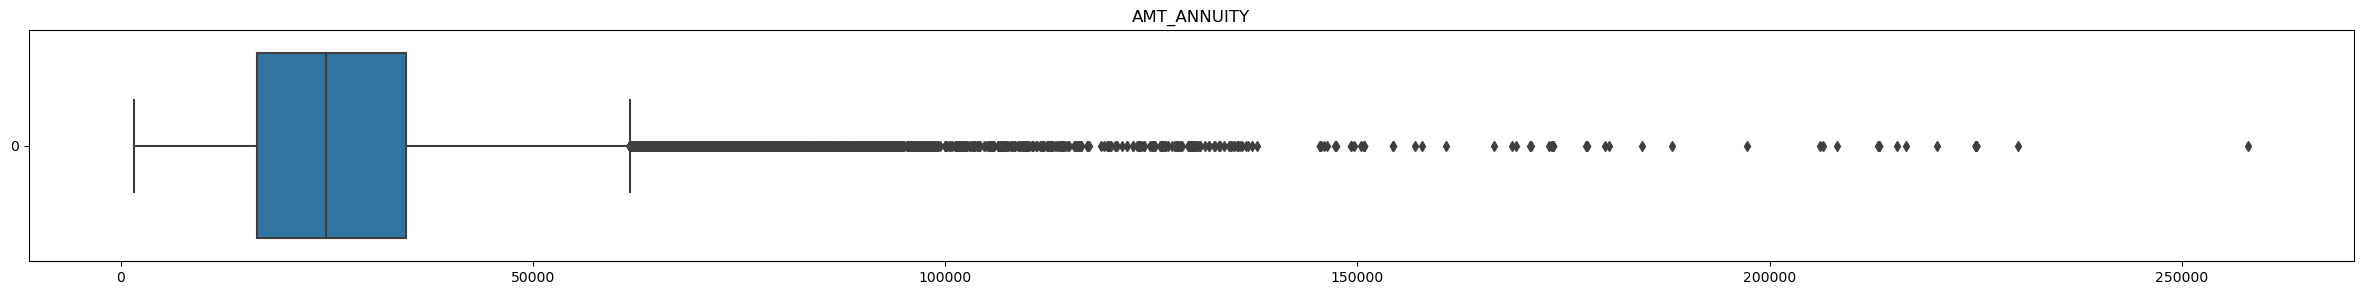

In [58]:
plt.figure(figsize=[30,3])
sns.boxplot(apl_df['AMT_ANNUITY'], orient='h')
plt.title('AMT_ANNUITY')
plt.show()

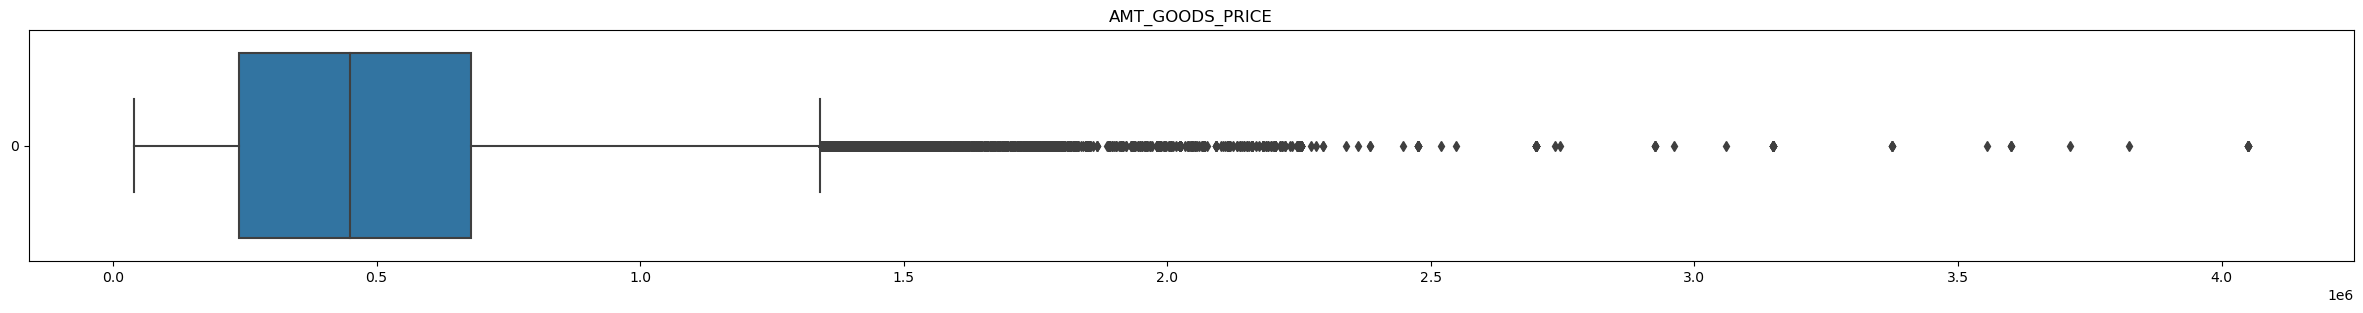

In [59]:
plt.figure(figsize=[30,3])
sns.boxplot(apl_df['AMT_GOODS_PRICE'], orient='h')
plt.title('AMT_GOODS_PRICE')
plt.show()

### NOTE:
As evident from the boxplot of all four 'AMT-' columns, there are a lot of outliers in these columns, we can either drop the rows that corresponding to these outliers and proceed with the analysis, but in our case, since I think, these are some of the significant columns, I wish to keep them intact for our analysis.

### NOTE:
ALso, AMT_ANNUITY and AMT_GOODS_PRICE are numerical values with big numbers, I think it would be ideal to impute missing values with mean as it would not disturb the distribution that much

now lets look at NAME_TYPE_SUITE column

In [60]:
apl_df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

### NOTE:
as evident from the above description, NAME_TYPE_SUITE is a categorical column and hence the best way is to impute the missing values with most common category i.e. Unaccompanied in this case. or fill the empty cells with another new category "Unknown" and prodeed with the analysis

checking other columns:

In [61]:
apl_df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [62]:
apl_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

### NOTE:
as can be seen from the above, in CODE_GENDER column, there are 4 'XNA' values, which may be treated as missing values and can be replaced by np.nan. or being a categorical variable, can be replaced by most common category i.e. 'F' in this case as Females are in majority

In [63]:
apl_df['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [64]:
apl_df['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

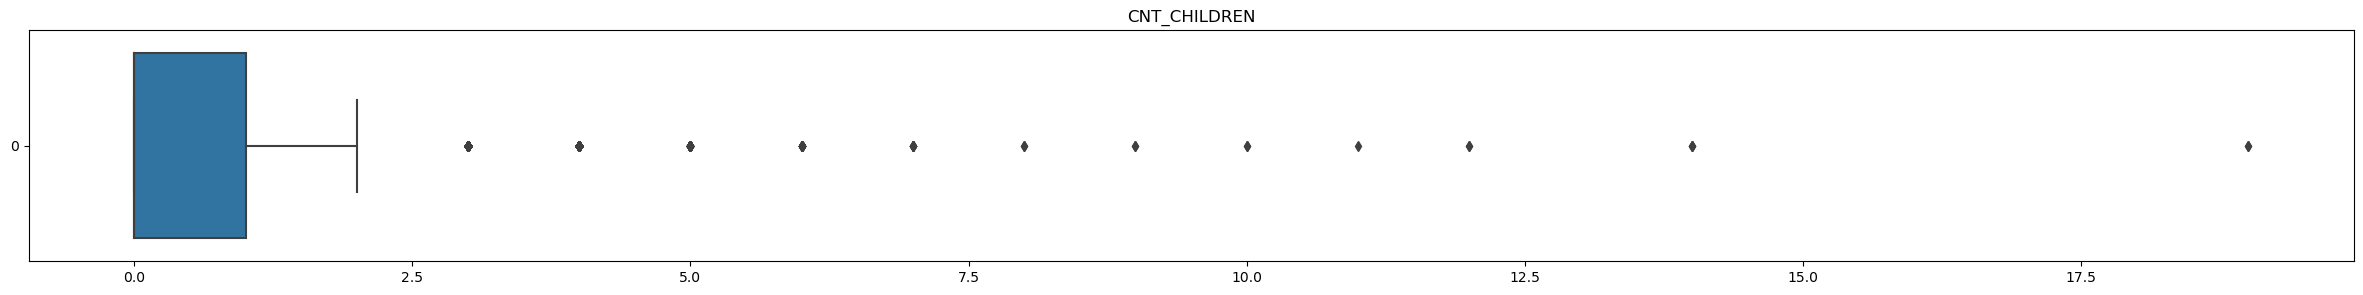

In [65]:
plt.figure(figsize=[30,3])
sns.boxplot(apl_df['CNT_CHILDREN'], orient='h')
plt.title('CNT_CHILDREN')
plt.show()

### NOTE:
* as evident from the description of CNT_CHILDERN column and also its corresponding boxplot, 1st quartile is completely is completely missing from the boxplot as most of the data is present in the second quartile ie, above 75%.
* Also, as can be seen from the boxplot, there are a very few outliers corresponding to number of childern usually greater than 4 which is a rarity. hence this data can be termed as reliable

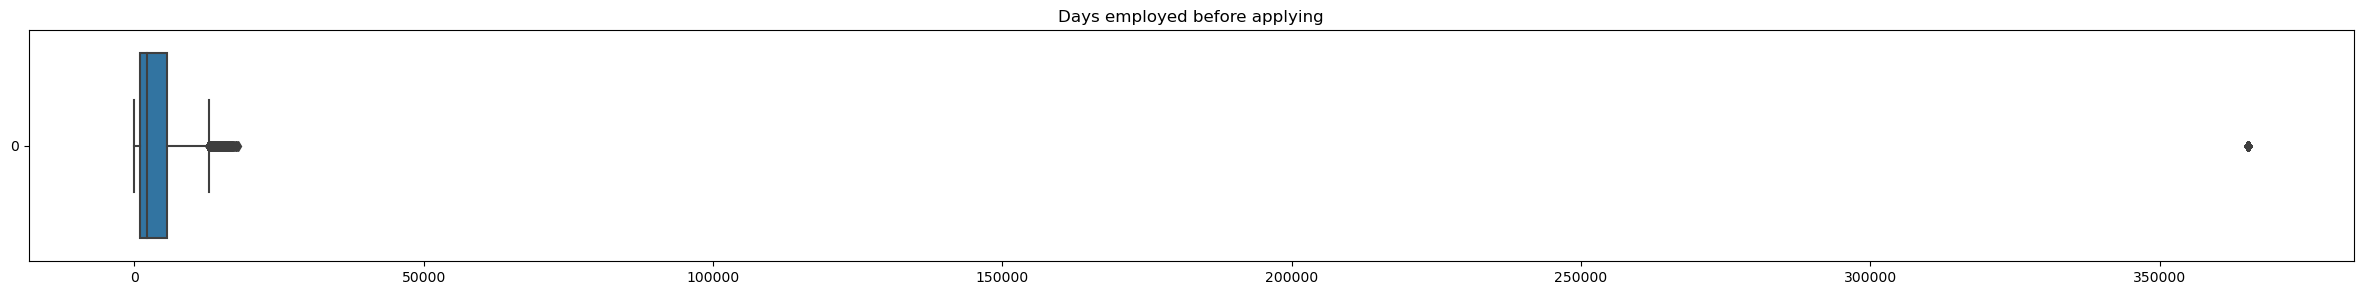

In [66]:
apl_df['DAYS_EMPLOYED'] = abs(apl_df['DAYS_EMPLOYED'])
# now lets check 'DAYS_EMPLOYED' column
plt.figure(figsize=[30,3])
sns.boxplot(apl_df['DAYS_EMPLOYED'], orient='h')
plt.title("Days employed before applying")
plt.show()

### NOTE:
one of the outlier point is above 350000 days which is roughly 958 years of employment which is not possible and hence we may conclude that it is a wrong data

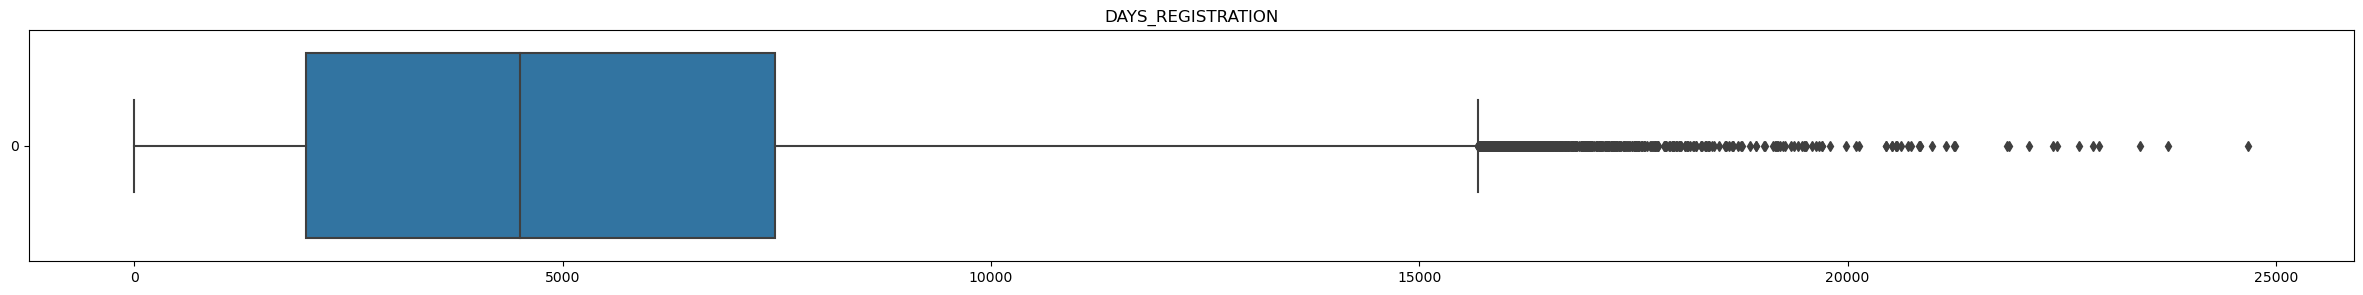

In [67]:
apl_df['DAYS_REGISTRATION'] = abs(apl_df['DAYS_REGISTRATION'])
# now lets check 'DAYS_REGISTRATION' column
plt.figure(figsize=[30,3])
sns.boxplot(apl_df['DAYS_REGISTRATION'], orient='h')
plt.title("DAYS_REGISTRATION")
plt.show()

### NOTE:
as the max age of applicant is 69 years, the years before which that applicant has changed his registration should be less than 68 years or 25000 days which is true as evident from the boxplot above, hence the data is reliable

In [68]:
# we have also some XAN values in 'ORGANIZATION_TYPE' column which need to be addressed by replacing XNA with "Unknown"
apl_df['ORGANIZATION_TYPE'] = apl_df['ORGANIZATION_TYPE'].replace()

# STEP 2:  Standardisation of values

the colums AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE are all large values and hence, I wish to arrange them into bins in order to better understand the data.

In [69]:
apl_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT',
'AMT_ANNUITY', 'AMT_GOODS_PRICE']].head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
0          202500.0    406597.5      24700.5         351000.0
1          270000.0   1293502.5      35698.5        1129500.0
2           67500.0    135000.0       6750.0         135000.0
3          135000.0    312682.5      29686.5         297000.0
4          121500.0    513000.0      21865.5         513000.0

since these columns contain values ranging from few thousands to more than 10L, I can divide them into 11 bins as : ['0-1L', '1-2L', '2-3L', '3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','>10L' ]

In [70]:
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 100000000]
slots = ['below 1L', '1-2L', '2-3L', '3-4L', '4-5L', '5-6L', '6-7L', '7-8L', '8-9L', '9-10L', 'Above 10L']
apl_df['Income_range'] = pd.cut(apl_df['AMT_INCOME_TOTAL'], bins=bins, labels=slots)

In [71]:
# # binning all the 'AMT-' columns in terms of rupees in Lakhs
# bins = [0,1,2,3,4,5,6,7,8,9,10,11]
# slots = ['0-1L', '1-2L', '2-3L', '3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','Above 10L' ]
# apl_df['AMT_INCOME_TOTAL'] = apl_df['AMT_INCOME_TOTAL']/100000
# apl_df['Income_range'] = pd.cut(apl_df['AMT_INCOME_TOTAL'], bins=bins, labels=slots)

In [72]:
apl_df['Income_range'].value_counts(normalize=True)*100

1-2L         50.696888
2-3L         21.194758
below 1L     20.714123
3-4L          4.772528
4-5L          1.743358
5-6L          0.356086
6-7L          0.282592
8-9L          0.096907
Above 10L     0.080973
7-8L          0.052681
9-10L         0.009105
Name: Income_range, dtype: float64

In [73]:
apl_df['Credit_amt_range'] = pd.cut(apl_df['AMT_CREDIT'], bins=bins, labels=slots)

In [74]:
apl_df['Credit_amt_range'].value_counts(normalize=True)*100

2-3L         17.824728
Above 10L    16.254703
5-6L         11.131960
4-5L         10.418489
1-2L          9.801275
3-4L          8.564897
6-7L          7.820533
8-9L          7.086576
7-8L          6.241403
9-10L         2.902986
below 1L      1.952450
Name: Credit_amt_range, dtype: float64

In [75]:
apl_df['Goods_price_range'] = pd.cut(apl_df['AMT_GOODS_PRICE'], bins=bins, labels=slots)
apl_df['Goods_price_range'].value_counts(normalize=True)*100

2-3L         20.427819
4-5L         18.543906
6-7L         13.027246
Above 10L    11.105252
1-2L         10.726712
8-9L          6.992738
3-4L          6.906485
5-6L          4.269398
below 1L      2.834656
7-8L          2.639690
9-10L         2.526096
Name: Goods_price_range, dtype: float64

In [76]:
apl_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
  

In [77]:
# now we will define new column 'age' and try to get the age of the applicant from the 'DAYS_BIRTH' column
apl_df["age_in_years"] = round(apl_df['DAYS_BIRTH']/365, 0).astype('int64')

In [78]:
print(min(apl_df['age_in_years'])) #minimum age of applicant
print(max(apl_df['age_in_years'])) #maximum age of applicant

21
69


In [79]:
# grouping applicants based on their age
bins = [20, 30, 40, 50, 60, 70]
slots = ['20-30', '30-40', '40-50', '50-60', '60-70']
apl_df['age_group'] = pd.cut(apl_df['age_in_years'], bins=bins, labels=slots)
apl_df['age_group'].value_counts(normalize=True)*100

30-40    26.916110
40-50    24.554894
50-60    22.098396
20-30    15.891789
60-70    10.538810
Name: age_group, dtype: float64

In [80]:
# while doing univariate analysis, it has been found that there are some XNA values in 'CODE_GENDER' so handling them here
apl_df['CODE_GENDER'] = apl_df['CODE_GENDER'].replace('XNA', np.NaN)

## Univariate analysis

before we start the univariate analysis, we need to split the data into two separate dataframes, defaulters and repayers

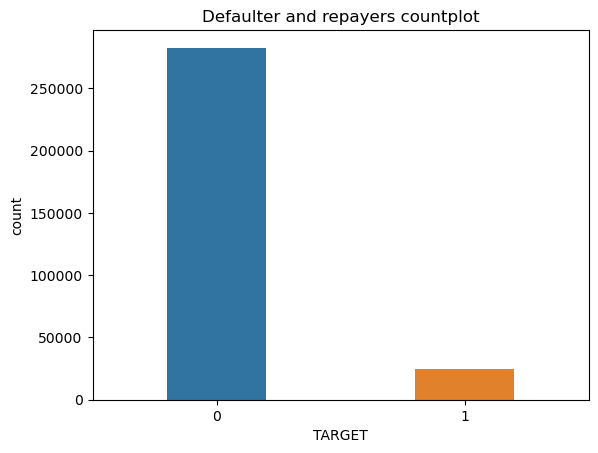

In [81]:
sns.countplot(data=apl_df, x = 'TARGET', width=0.4)
plt.title("Defaulter and repayers countplot")
plt.show()

as you can see from the countplot, there is a huge variation in number of defaulters and repayers

In [82]:
Defaulters = apl_df[apl_df['TARGET'] == 1]
Repayers = apl_df[apl_df['TARGET']==0]

In [83]:
apl_df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   
5      100008       0         Cash loans           M               Y   
6      100009       0         Cash loans           F               Y   
7      100010       0         Cash loans           M               Y   
8      100011       0         Cash loans           F               Y   
9      100012       0    Revolving loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   
5             0           99000.0    490495.5      27517.5         454500.0   
6             1          171000.0   1560726.0      41301.0        1395000.0   
7             0          360000.0   1530000.0      42075.0        1530000.0   
8             0          112500.0   1019610.0      33826.5         913500.0   
9             0          135000.0    405000.0      20250.0         405000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE  REGION_POPULATION_RELATIVE  \
0    Unaccompanied               Working                    0.018801   
1           Family         State servant                    0.003541   
2    Unaccompanied               Working                    0.010032   
3    Unaccompanied               Working                    0.008019   
4    Unaccompanied               Working                    0.028663   
5  Spouse, partner         State servant                    0.035792   
6    Unaccompanied  Commercial associate                    0.035792   
7    Unaccompanied         State servant                    0.003122   
8         Children             Pensioner                    0.018634   
9    Unaccompanied               Working                    0.019689   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0        9461            637             3648.0             2120           1   
1       16765           1188             1186.0              291           1   
2       19046            225             4260.0             2531           1   
3       19005           3039             9833.0             2437           1   
4       19932           3038             4311.0             3458           1   
5       16941           1588             4970.0              477           1   
6       13778           3130             1213.0              619           1   
7       18850            449             4597.0             2379           1   
8       20099         365243             7427.0             3514           1   
9       14469           2019            14437.0             3992           1   

   FLAG_EMP_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0               1        Laborers              1.0                     2   
1               1      Core staff              2.0                     1   
2               1        Laborers              1.0                     2   
3               1        Laborers              2.0                     2   
4               1      Core staff              1.0                     2   
5               1        Laborers              2.0                     2   
6               1     Accountants              3.0                     2   
7               1        Managers              2.0        

In [84]:
apl_df['FLAG_MOBIL'] = apl_df['FLAG_MOBIL'].replace({1:'Y', 0:'N'})

In [85]:
# handling few columns that are flag values
apl_df['FLAG_EMP_PHONE'] = apl_df['FLAG_EMP_PHONE'].replace({1:'Y', 0:'N'})
apl_df['FLAG_DOCUMENT_3'] = apl_df['FLAG_DOCUMENT_3'].replace({1:'Y', 0:'N'})
apl_df['REG_REGION_NOT_LIVE_REGION'] = apl_df['REG_REGION_NOT_LIVE_REGION'].replace({1:'Y', 0:'N'})
apl_df['REG_REGION_NOT_WORK_REGION'] = apl_df['REG_REGION_NOT_WORK_REGION'].replace({1:'Y', 0:'N'})
apl_df['REG_REGION_NOT_WORK_REGION'] = apl_df['REG_REGION_NOT_WORK_REGION'].replace({1:'Y', 0:'N'})
apl_df['LIVE_REGION_NOT_WORK_REGION'] = apl_df['LIVE_REGION_NOT_WORK_REGION'].replace({1:'Y', 0:'N'})
apl_df['REG_CITY_NOT_LIVE_CITY'] = apl_df['REG_CITY_NOT_LIVE_CITY'].replace({1:'Y', 0:'N'})
apl_df['REG_CITY_NOT_WORK_CITY'] = apl_df['REG_CITY_NOT_WORK_CITY'].replace({1:'Y', 0:'N'})
apl_df['LIVE_CITY_NOT_WORK_CITY'] = apl_df['LIVE_CITY_NOT_WORK_CITY'].replace({1:'Y', 0:'N'})

In [86]:
apl_df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   
5      100008       0         Cash loans           M               Y   
6      100009       0         Cash loans           F               Y   
7      100010       0         Cash loans           M               Y   
8      100011       0         Cash loans           F               Y   
9      100012       0    Revolving loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   
5             0           99000.0    490495.5      27517.5         454500.0   
6             1          171000.0   1560726.0      41301.0        1395000.0   
7             0          360000.0   1530000.0      42075.0        1530000.0   
8             0          112500.0   1019610.0      33826.5         913500.0   
9             0          135000.0    405000.0      20250.0         405000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE  REGION_POPULATION_RELATIVE  \
0    Unaccompanied               Working                    0.018801   
1           Family         State servant                    0.003541   
2    Unaccompanied               Working                    0.010032   
3    Unaccompanied               Working                    0.008019   
4    Unaccompanied               Working                    0.028663   
5  Spouse, partner         State servant                    0.035792   
6    Unaccompanied  Commercial associate                    0.035792   
7    Unaccompanied         State servant                    0.003122   
8         Children             Pensioner                    0.018634   
9    Unaccompanied               Working                    0.019689   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL  \
0        9461            637             3648.0             2120          Y   
1       16765           1188             1186.0              291          Y   
2       19046            225             4260.0             2531          Y   
3       19005           3039             9833.0             2437          Y   
4       19932           3038             4311.0             3458          Y   
5       16941           1588             4970.0              477          Y   
6       13778           3130             1213.0              619          Y   
7       18850            449             4597.0             2379          Y   
8       20099         365243             7427.0             3514          Y   
9       14469           2019            14437.0             3992          Y   

  FLAG_EMP_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0              Y        Laborers              1.0                     2   
1              Y      Core staff              2.0                     1   
2              Y        Laborers              1.0                     2   
3              Y        Laborers              2.0                     2   
4              Y      Core staff              1.0                     2   
5              Y        Laborers              2.0                     2   
6              Y     Accountants              3.0                     2   
7              Y        Managers              2.0                     3   
8 

In [87]:
apl_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                       object
FLAG_EMP_PHONE                   object
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64


#### dividing the columns into numerical and categorical columns

In [88]:
num_col = [] # numerical data type columns
for col in apl_df.columns:
    if apl_df[col].dtypes == 'int64' or apl_df[col].dtypes == 'float64':
        num_col.append(col)

In [89]:
apl_df[num_col].dtypes

SK_ID_CURR                       int64
TARGET                           int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
HOUR_APPR_PROCESS_START          int64
OBS_30_CNT_SOCIAL_CIRCLE       float64
DEF_30_CNT_SOCIAL_CIRCLE       float64
OBS_60_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
DAYS_LAST_PHONE_CHANGE         float64
AMT_REQ_CREDIT_BUREAU_HOUR     float64
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT

In [90]:
cat_col = [] # categorical/ object type columsn
for col in apl_df.columns:
    if col not in num_col:
        cat_col.append(col)
apl_df[cat_col].dtypes

NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_REALTY                  object
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
FLAG_MOBIL                       object
FLAG_EMP_PHONE                   object
OCCUPATION_TYPE                  object
WEEKDAY_APPR_PROCESS_START       object
REG_REGION_NOT_LIVE_REGION       object
REG_REGION_NOT_WORK_REGION       object
LIVE_REGION_NOT_WORK_REGION      object
REG_CITY_NOT_LIVE_CITY           object
REG_CITY_NOT_WORK_CITY           object
LIVE_CITY_NOT_WORK_CITY          object
ORGANIZATION_TYPE                object
FLAG_DOCUMENT_3                  object
Education type                   object
Family_info                      object
Housing_type                     object
Income_range                   category
Credit_amt_range               category
Goods_price_range              category
age_group                      category
dtype: object

### univariate analysis of categorical variables / object type variables

In [91]:
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FLAG_DOCUMENT_3',
 'Education type',
 'Family_info',
 'Housing_type',
 'Income_range',
 'Credit_amt_range',
 'Goods_price_range',
 'age_group']

In [92]:
# now let us see how various client information effects the target variable
client_info = ['CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'Education type', 'Family_info', 'Housing_type', 'Income_range', 'age_group']

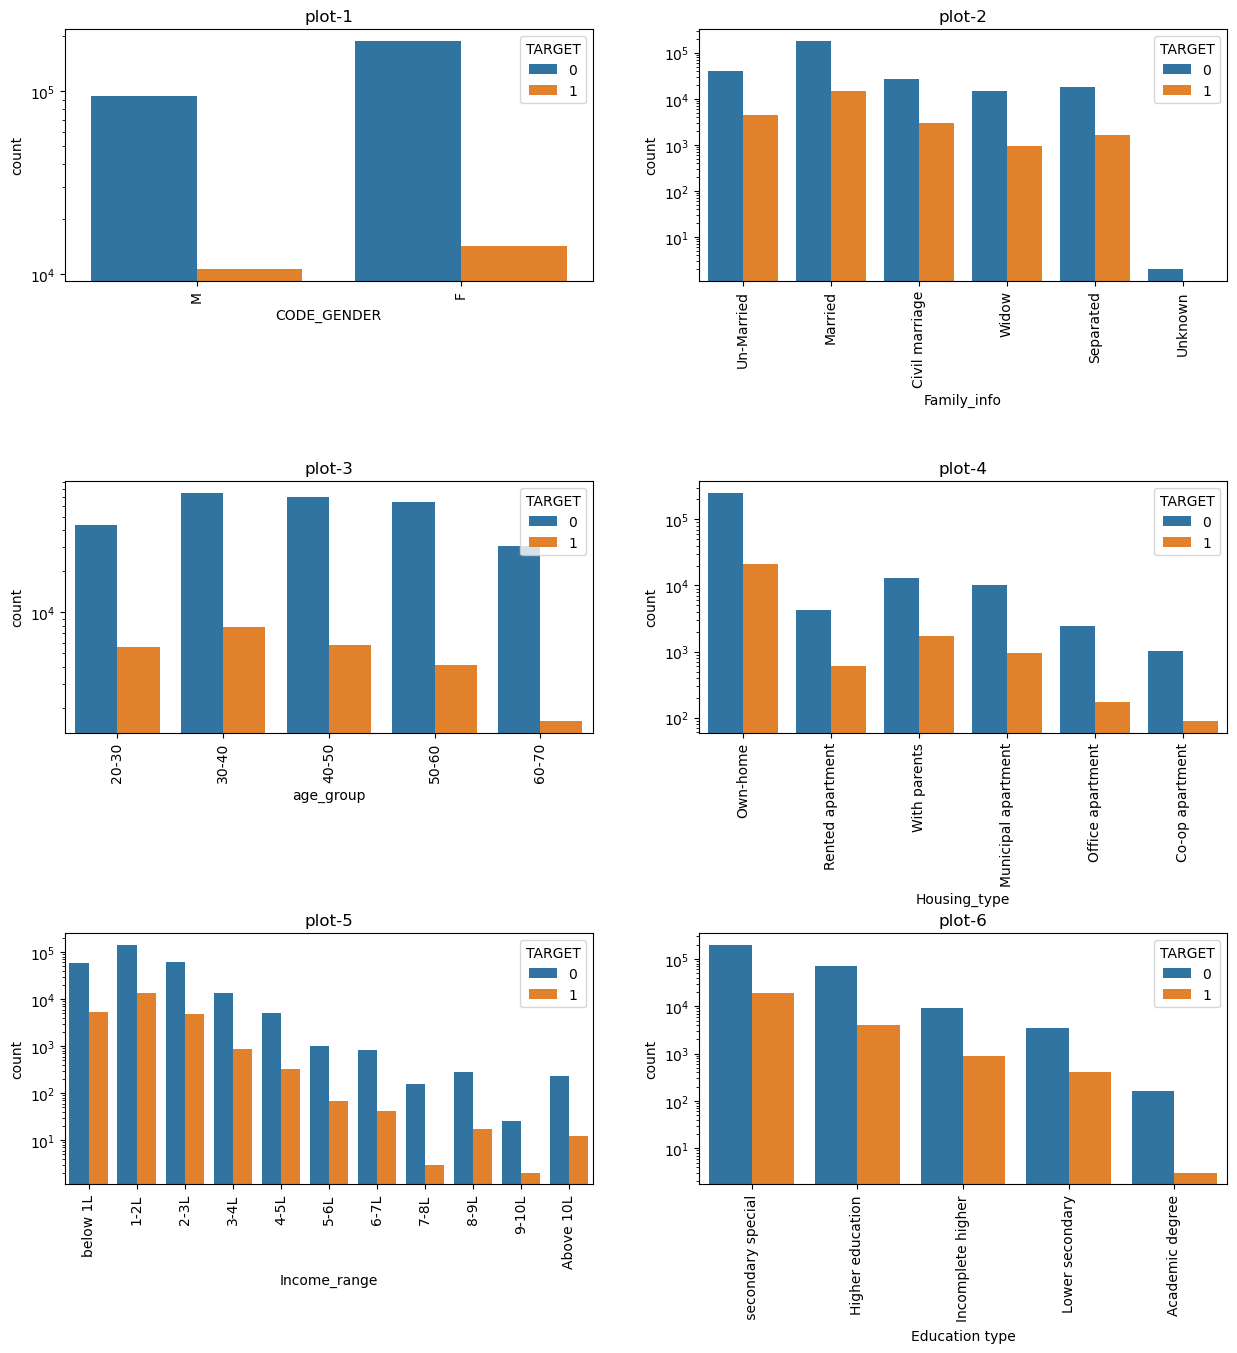

In [93]:
# from client_info. let us study how the gender, family_info, age_group, housing_type, income_range and education_type of the client has their effect on target value
personal_info = ['CODE_GENDER', 'Family_info', 'age_group', 'Housing_type', 'Income_range', 'Education type']
plt.figure(figsize=[15,15])
for index, col in enumerate(personal_info):
    plt.subplot(3,2,index+1)
    plt.subplots_adjust(hspace=0.8)
    sns.countplot(x=col, data=apl_df, hue='TARGET')
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.title("plot-{}".format(index+1))

### NOTE: inference from the plots above
* plot-1: female clients are likely to default than male clients (XNA - is present because as instructed, I haven't handled the missing values and left them as it is)
* plot-2: married clients are likely to default than other clients
* plot-3: clients with age-group between 30-40 are more defaulters, then comes 40-50, and then 50-60
* plot-4: clients with own house/apartment are likely to default than those who stay in rented house or with their parents
* plot-5: clients with income in the range 1-2L are likely to default than clients with other income groups
* plot-6: clients with secondary special education are likely to default.

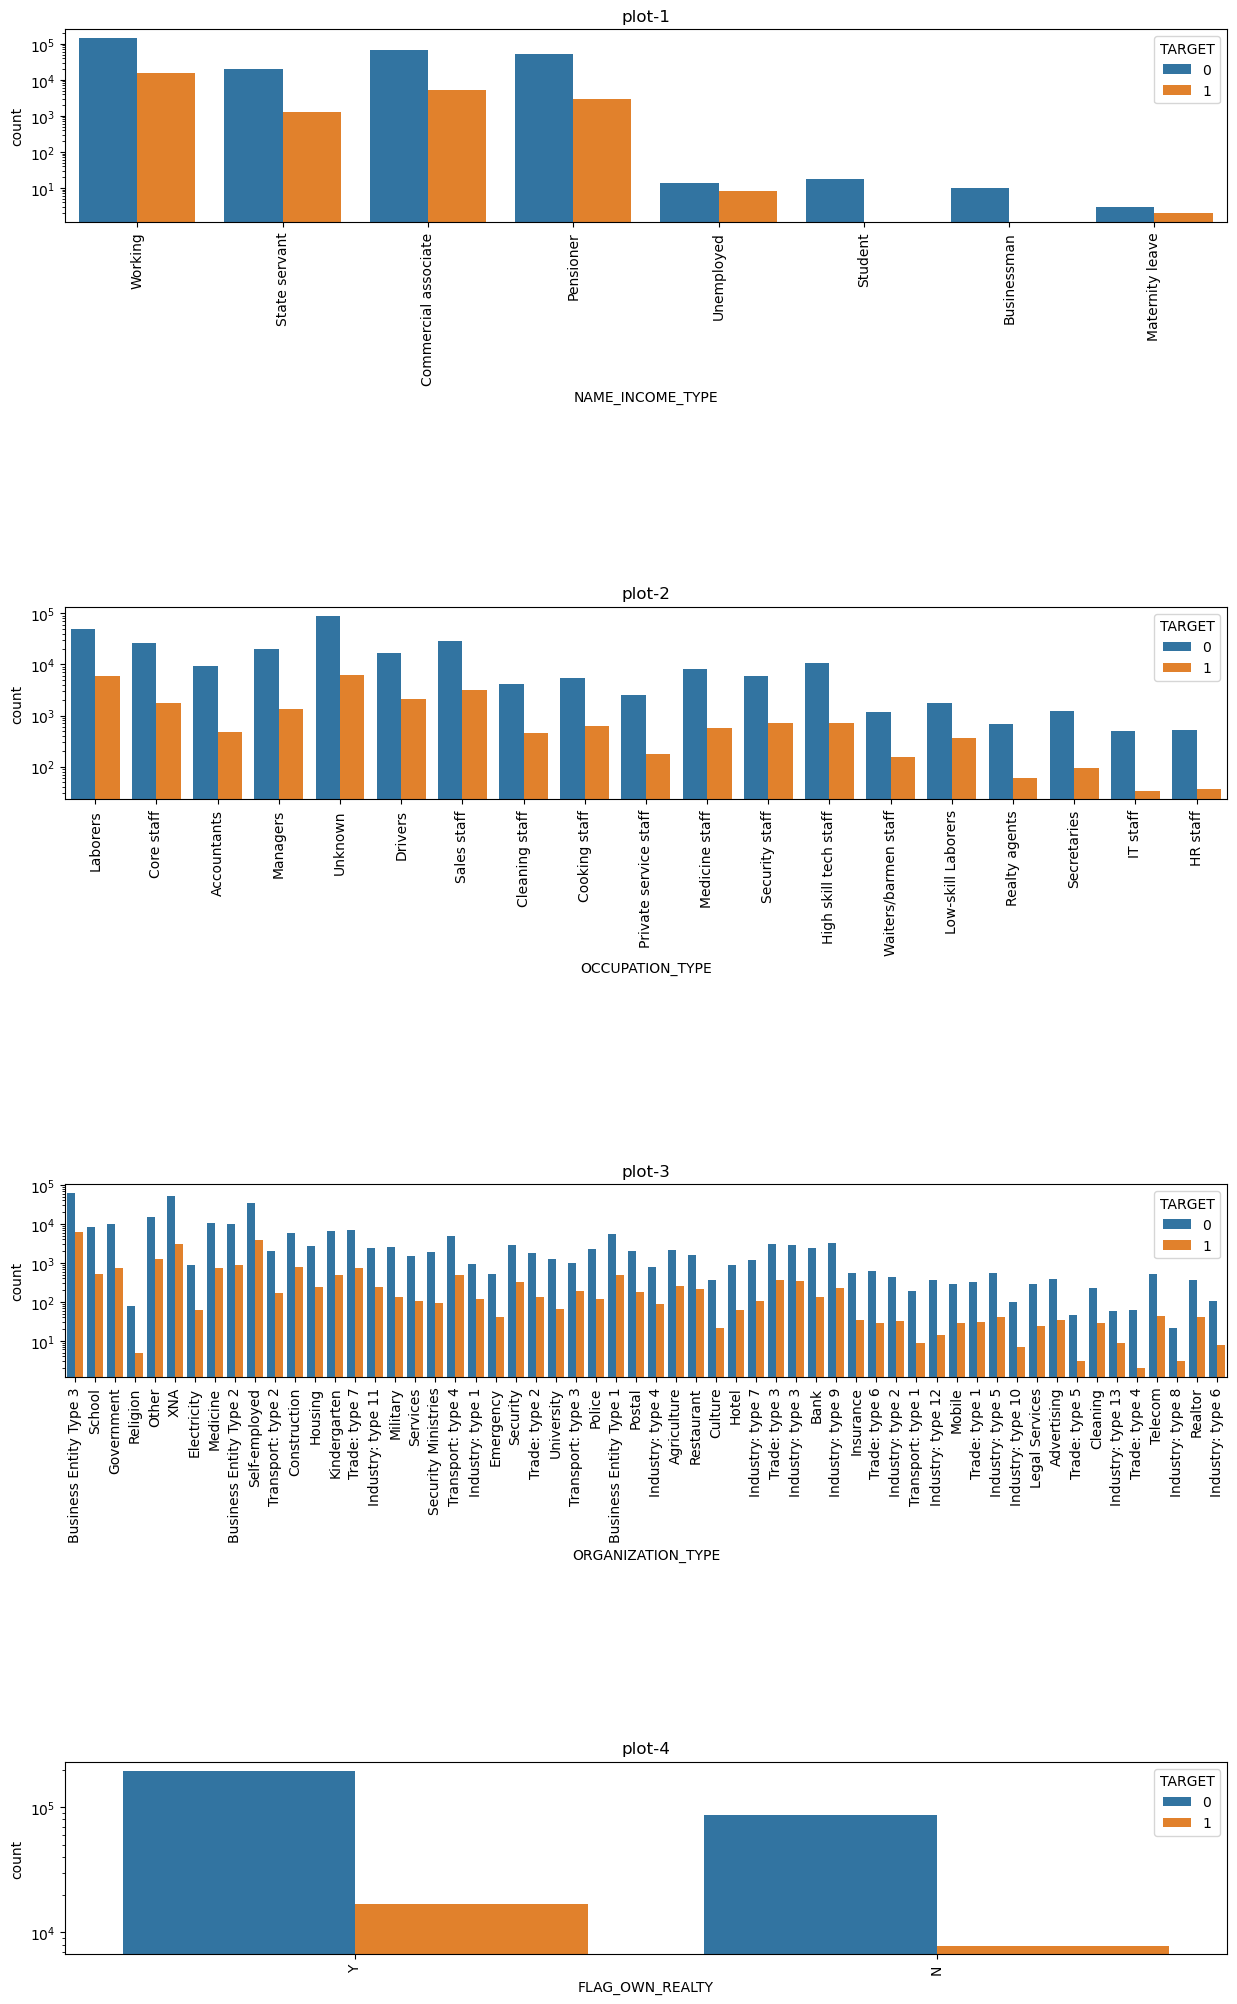

In [94]:
# now let see how 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_OWN_REALTY' effect the target variable
work_info = ['NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_OWN_REALTY']
plt.figure(figsize = [15, 25])
for index, col in enumerate(work_info):
    plt.subplot(4,1,index+1)
    plt.subplots_adjust(hspace=2)
    sns.countplot(x=col, data=apl_df, hue='TARGET')
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.title("plot-{}".format(index+1))

### NOTE: inferences from the above plots
* plot-1: working clients are likely to default.
* plot-2: clients who haven't specified their occupation type are likely defaulters.  of those who mentioned their occupation, labourers are likely defaulters.
* plot-3: clients who have business entity of type-3 are likely defaulters apart from those who haven't specified their organization type.
* plot-4: clients who have their own Realestate property are mostly turning defaulters than those who don't own any real-estate

In [95]:
contact_info = []
for i in client_info:
    if i not in personal_info and i not in work_info:
        contact_info.append(i)

In [96]:
contact_info

['NAME_TYPE_SUITE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE']

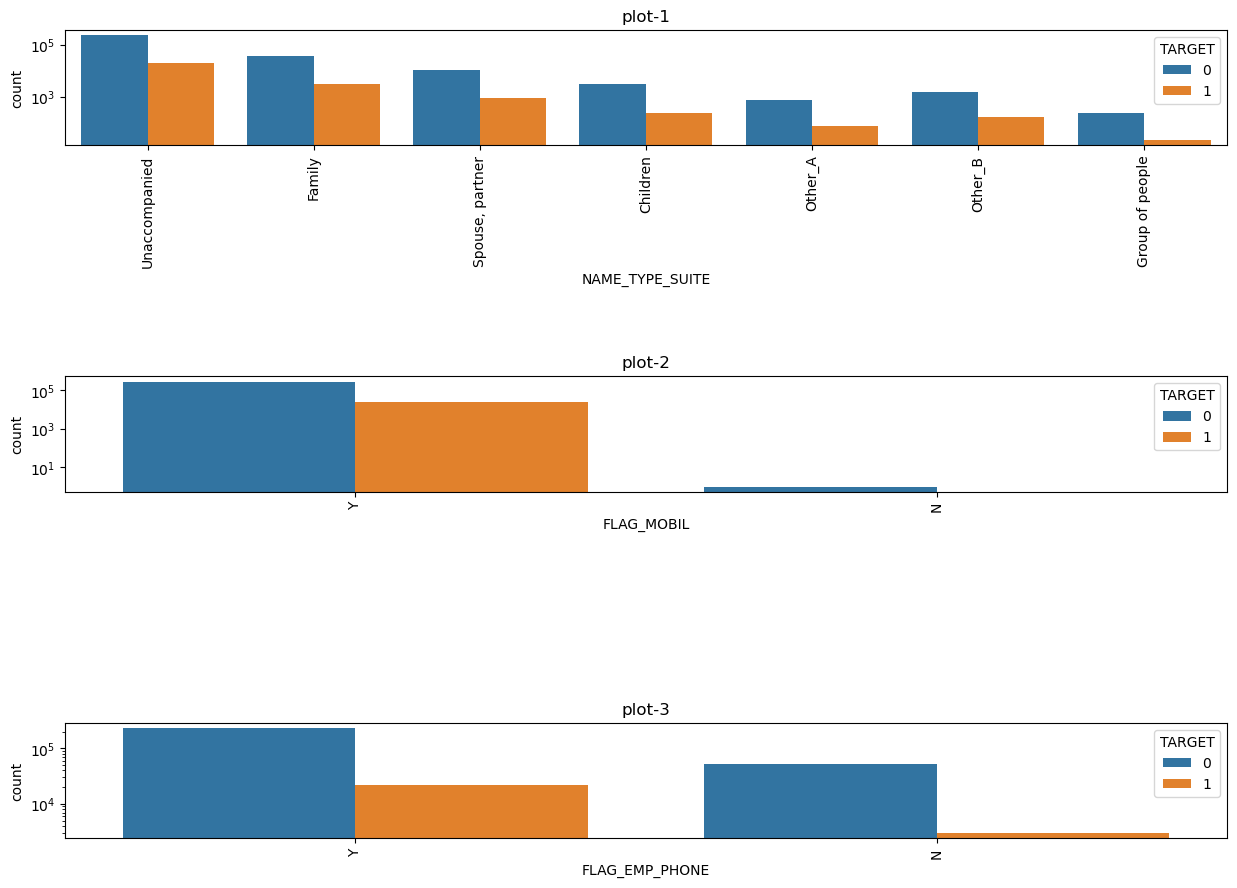

In [97]:
plt.figure(figsize = [15, 15])
for index, col in enumerate(contact_info):
    plt.subplot(4,1,index+1)
    plt.subplots_adjust(hspace=2)
    sns.countplot(x=col, data=apl_df, hue='TARGET')
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.title("plot-{}".format(index+1))

### NOTE: inferences from the above plots based on contact info
* plot-1: clients who were not accompanied by anyone are likely to become defaulters.
* plot-2: clients who provided their phone number are defaulting more than those who don't.
* plot-3: clients who provided their work phone number are defaulting more than those who don't.

# Bivariate and multivariate analysis

In [98]:
 num_col

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'age_in_years']

In [99]:
enquires_info = ['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

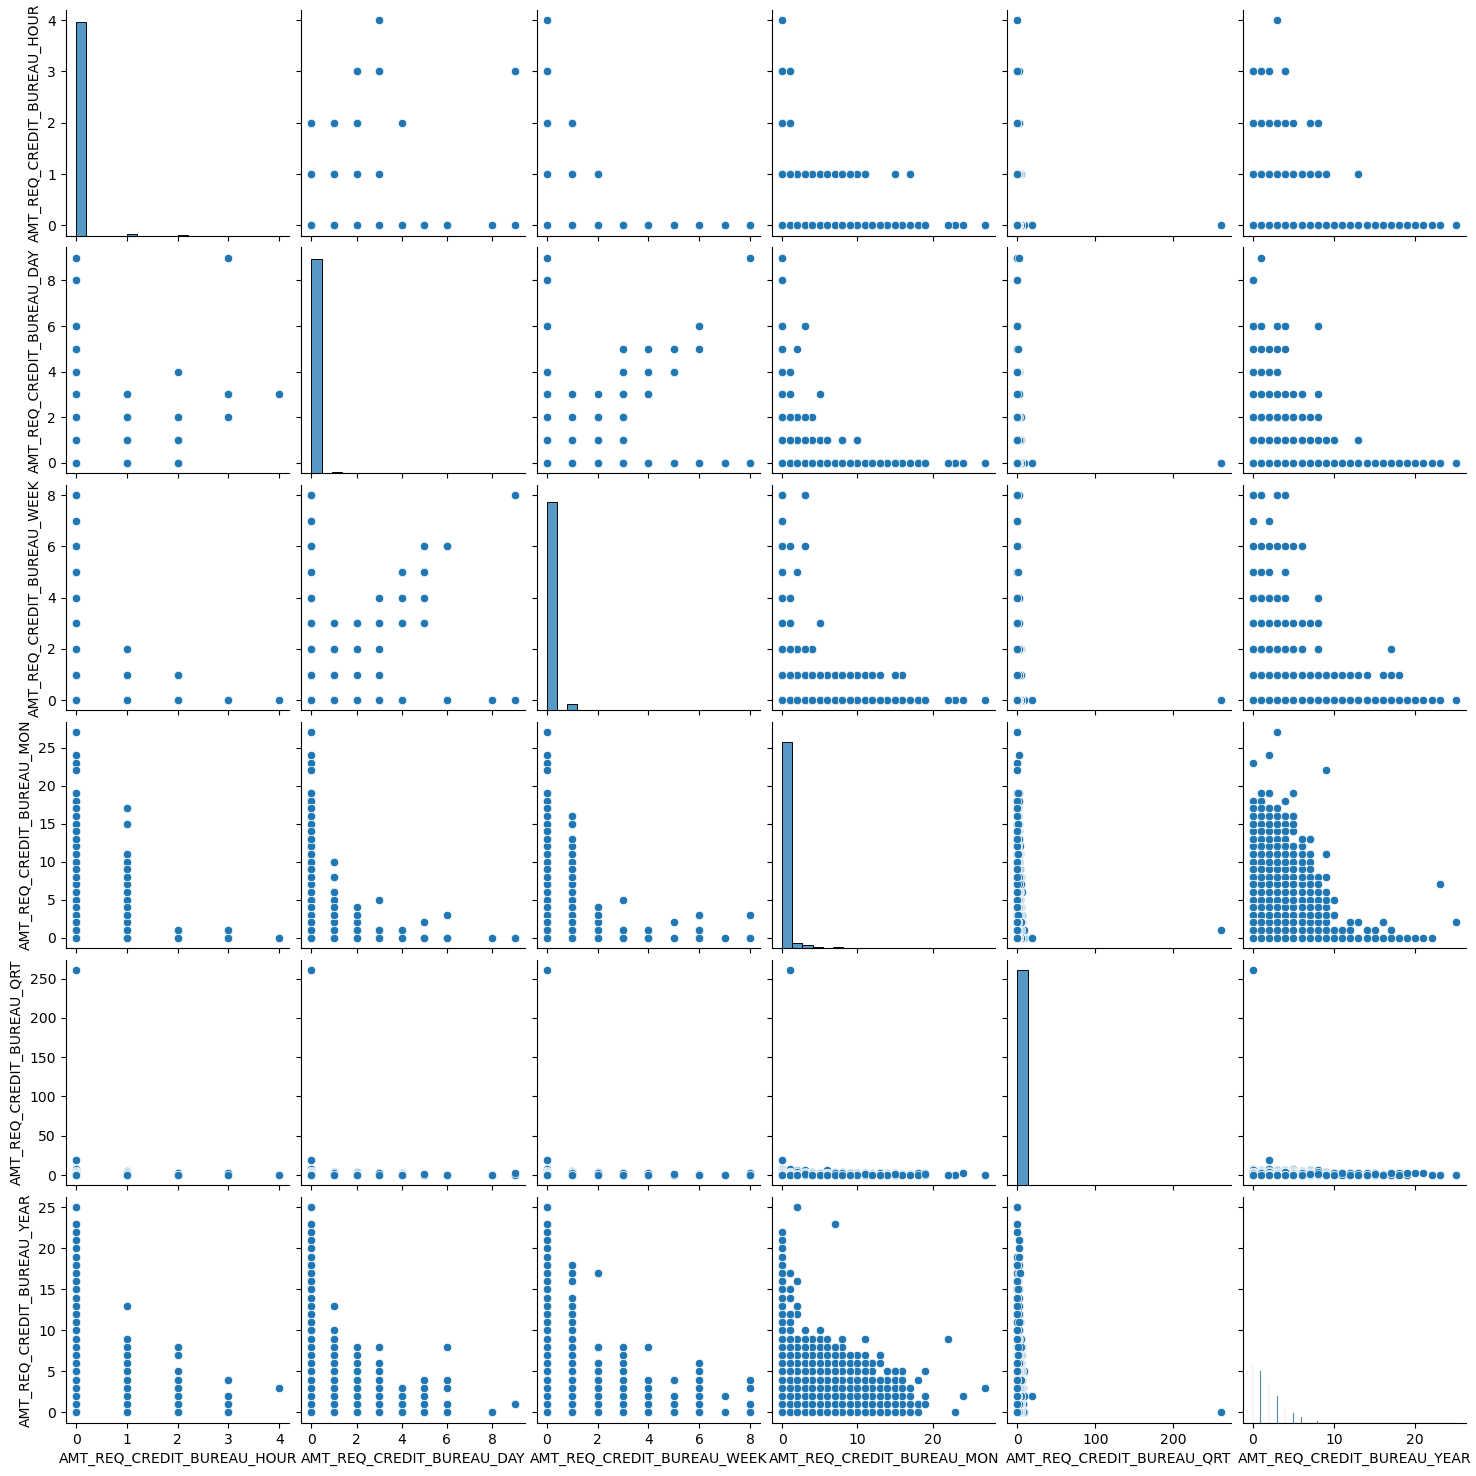

In [100]:
# for total dataset
sns.pairplot(apl_df[enquires_info])

#### NOTE:
from the above plots, there is clear observation that there is no proper relationship among these Enquiries attributes and hence they don't relate to each other

Text(0.5, 1.0, 'Defaulters')

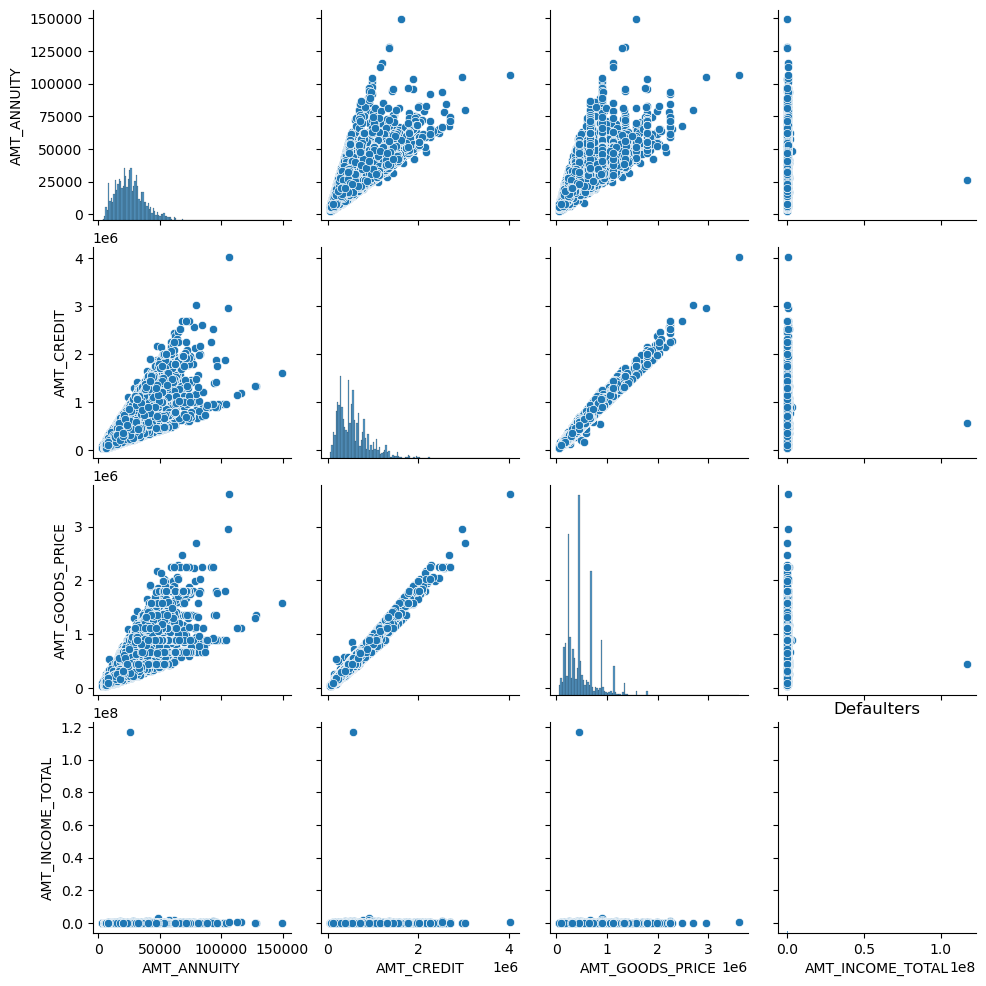

In [101]:
# checking Credit, Income, goods-price and annuity amount relation for Defaulters and Repayers
sns.pairplot(Defaulters[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']], )
plt.title('Defaulters')

#### NOTE: for Defaulters:
* goods_price and Credit amount have some linear relation among them
* goods-price and credit amount show some similar sort of relationship with Annuity amount

Text(0.5, 1.0, 'Repayers')

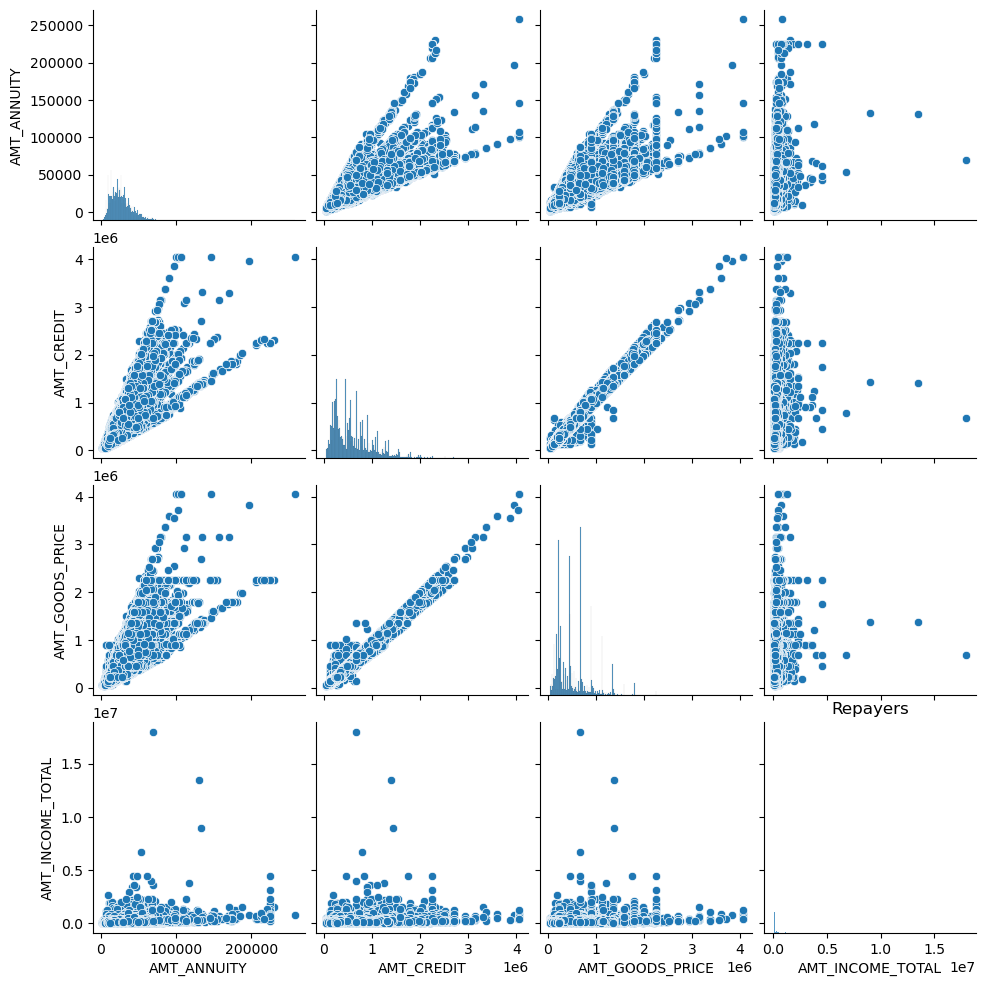

In [102]:
sns.pairplot(Repayers[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']])
plt.title('Repayers')

### NOTE: for repayers:
* similar kind of patterns are observed in case of both Repayers and Defaulters. but the scatter points in Repayers are more as the data is imbalanced

In [103]:
# effect of Social-circle on Defaulters and Repayers
social_circle_info = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

Text(0.5, 1.0, 'Defaulters')

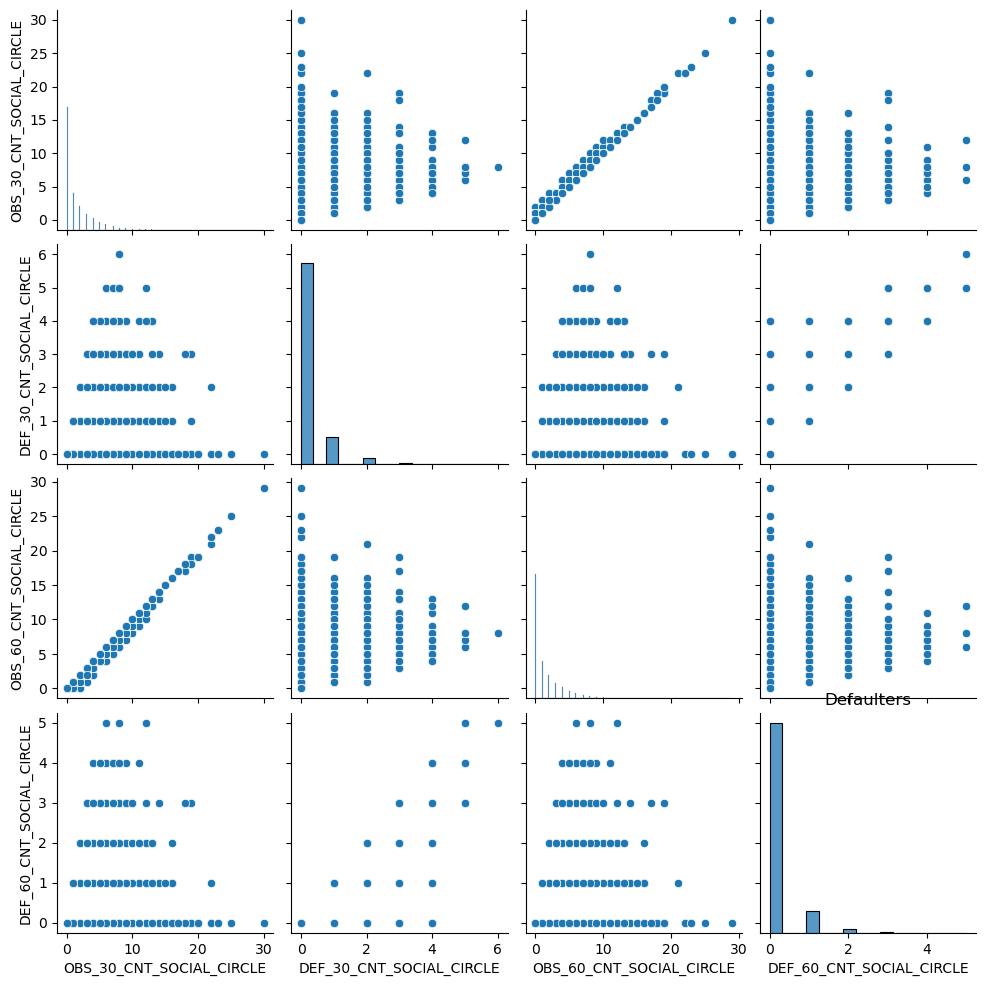

In [104]:
sns.pairplot(Defaulters[social_circle_info])
plt.title('Defaulters')

Text(0.5, 1.0, 'Repayers')

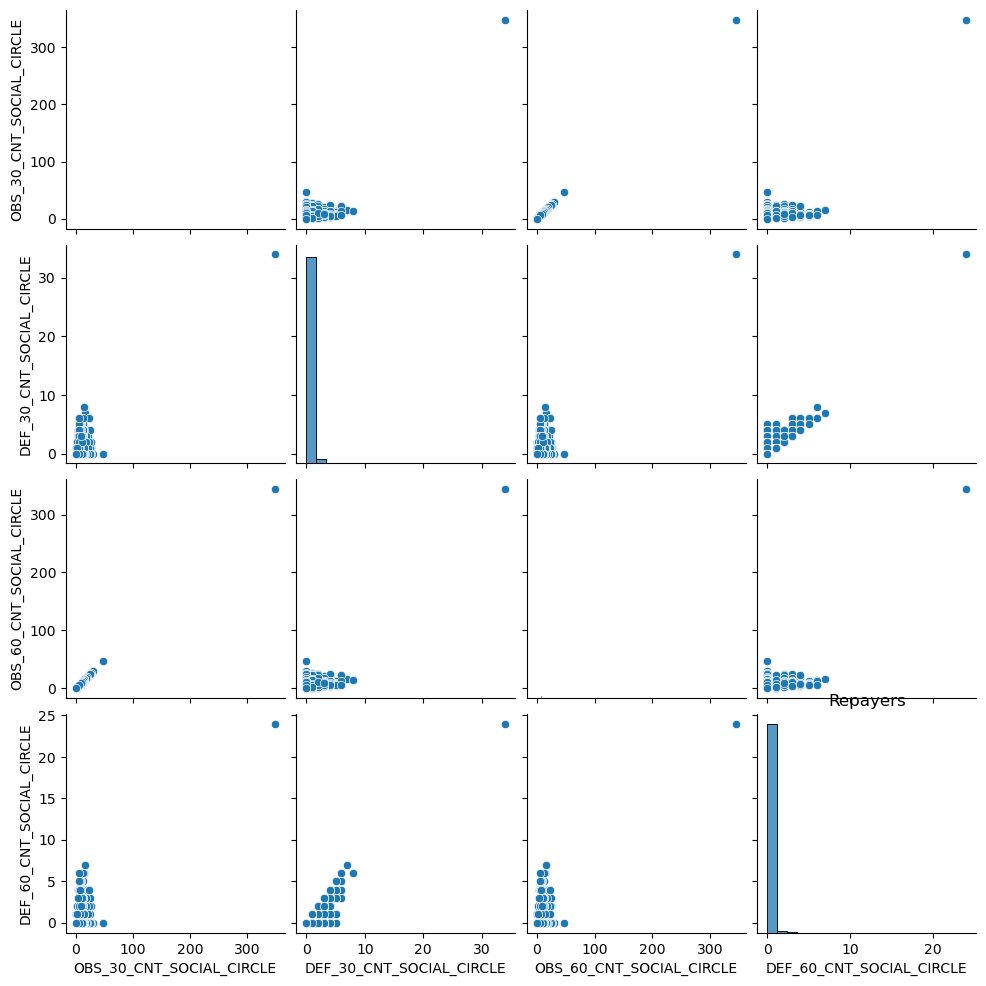

In [105]:
sns.pairplot(Repayers[social_circle_info])
plt.title('Repayers')

### NOTE: 
* in both the cases of Defaulters and Repayers, observable social surroundings of the client 30 DPD and 60 DPD show a linear relation.

Text(0.5, 1.0, 'Defaulters')

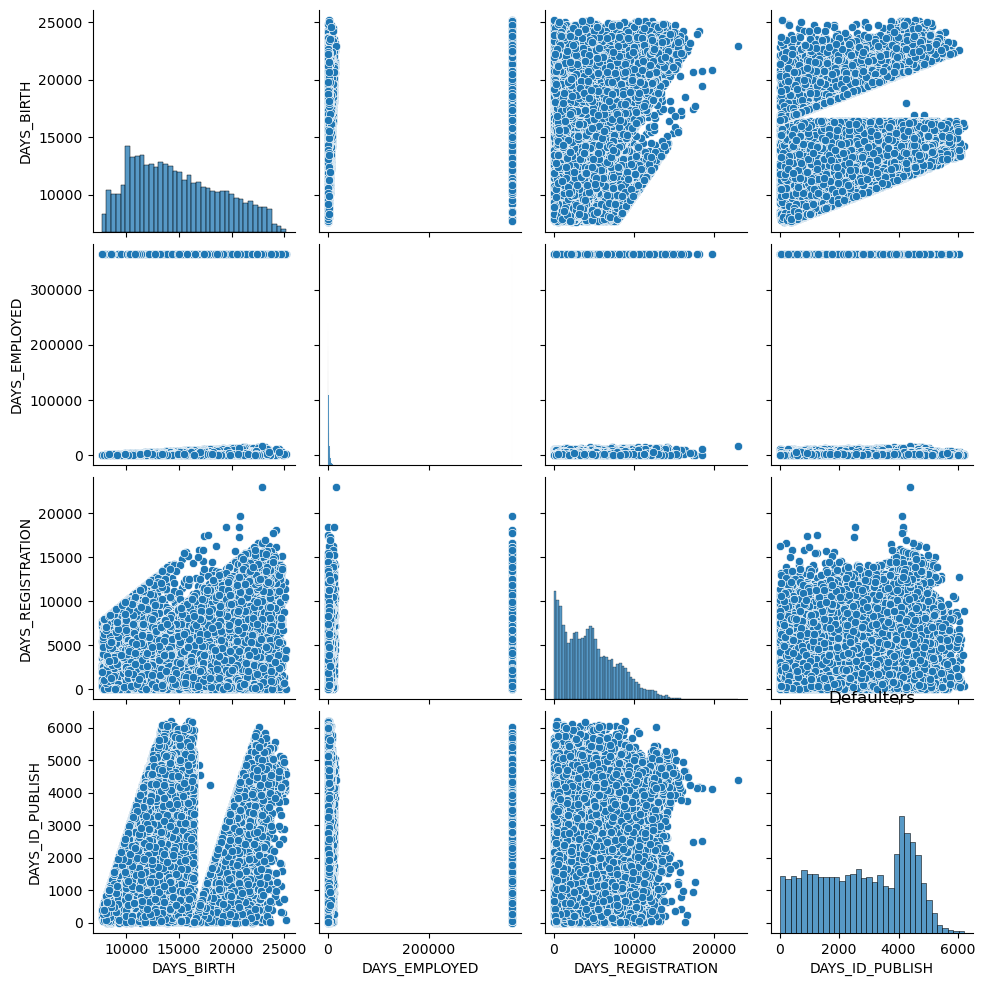

In [106]:
# effect of 'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' for Defaulters and Repayers
Days_info = ['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
sns.pairplot(Defaulters[Days_info])
plt.title('Defaulters')

Text(0.5, 1.0, 'Repayers')

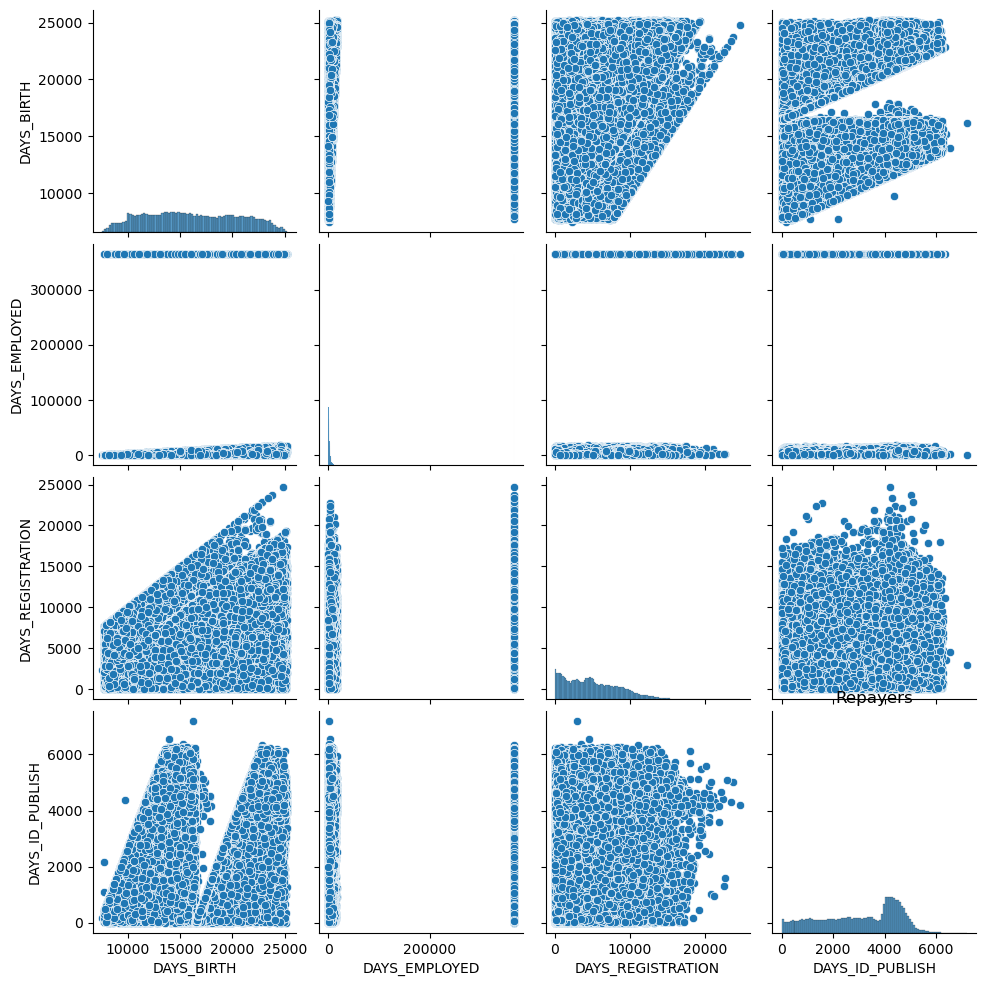

In [107]:
sns.pairplot(Repayers[Days_info])
plt.title('Repayers')

### NOTE:
* from the above two pairplots for Defaulters and Repayers, it has been found that there is not specific relation between 'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'

# Previous Application data:

In [108]:
prev_apl_df = pd.read_csv('previous_application.csv')
prev_apl_df.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

# Data Pre-Processing:

In [109]:
# checking the shape of the dataset
prev_apl_df.shape

(1670214, 37)

In [110]:
prev_apl_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [111]:
prev_apl_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [112]:
prev_apl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [113]:
prev_apl_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [114]:
# checking for duplicates
prev_apl_df.duplicated().sum() # 0 - which means there are no duplicates in the data

0

# Data cleaning of Previous_application dataset

In [115]:
missing_perc = pd.DataFrame(prev_apl_df.isnull().mean()*100)

In [116]:
col_to_drop = missing_perc[missing_perc[0] > 40]
col_to_drop.index

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [117]:
prev_apl_df.drop(col_to_drop.index, axis=1, inplace=True)

In [118]:
prev_apl_df.head(20)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      2030495      271877     Consumer loans     1730.430          17145.0   
1      2802425      108129         Cash loans    25188.615         607500.0   
2      2523466      122040         Cash loans    15060.735         112500.0   
3      2819243      176158         Cash loans    47041.335         450000.0   
4      1784265      202054         Cash loans    31924.395         337500.0   
5      1383531      199383         Cash loans    23703.930         315000.0   
6      2315218      175704         Cash loans          NaN              0.0   
7      1656711      296299         Cash loans          NaN              0.0   
8      2367563      342292         Cash loans          NaN              0.0   
9      2579447      334349         Cash loans          NaN              0.0   
10     1715995      447712         Cash loans    11368.620         270000.0   
11     2257824      161140         Cash loans    13832.775         211500.0   
12     2330894      258628         Cash loans    12165.210         148500.0   
13     1397919      321676     Consumer loans     7654.860          53779.5   
14     2273188      270658     Consumer loans     9644.220          26550.0   
15     1232483      151612     Consumer loans    21307.455         126490.5   
16     2163253      154602     Consumer loans     4187.340          26955.0   
17     1285768      142748    Revolving loans     9000.000         180000.0   
18     2393109      396305         Cash loans    10181.700         180000.0   
19     1173070      199178         Cash loans     4666.500          45000.0   

    AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0      17145.0          17145.0                   SATURDAY   
1     679671.0         607500.0                   THURSDAY   
2     136444.5         112500.0                    TUESDAY   
3     470790.0         450000.0                     MONDAY   
4     404055.0         337500.0                   THURSDAY   
5     340573.5         315000.0                   SATURDAY   
6          0.0              NaN                    TUESDAY   
7          0.0              NaN                     MONDAY   
8          0.0              NaN                     MONDAY   
9          0.0              NaN                   SATURDAY   
10    335754.0         270000.0                     FRIDAY   
11    246397.5         211500.0                     FRIDAY   
12    174361.5         148500.0                    TUESDAY   
13     57564.0          53779.5                     SUNDAY   
14     27252.0          26550.0                   SATURDAY   
15    119853.0         126490.5                    TUESDAY   
16     27297.0          26955.0                   SATURDAY   
17    180000.0         180000.0                     FRIDAY   
18    180000.0         180000.0                   THURSDAY   
19     49455.0          45000.0                   SATURDAY   

    HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                        15                           Y   
1                        11                           Y   
2                        11                           Y   
3                         7                           Y   
4                         9                           Y   
5                         8                           Y   
6                        11                           Y   
7                         7                           Y   
8                        15                           Y   
9                        15                           Y   
10                        7                           Y   
11                       10                           Y   
12                       15                           Y   
13                       15                           Y   
14                       10                           Y   
15                        7                           Y   
16                       12           

In [119]:
prev_apl_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [120]:
# dropping unnecessary columns:
unwanted_cols = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY']

In [121]:
prev_apl_df.drop(unwanted_cols, axis=1, inplace=True)

In [122]:
prev_apl_df.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0     17145.0          17145.0                           Y   
1    679671.0         607500.0                           Y   
2    136444.5         112500.0                           Y   
3    470790.0         450000.0                           Y   
4    404055.0         337500.0                           Y   
5    340573.5         315000.0                           Y   
6         0.0              NaN                           Y   
7         0.0              NaN                           Y   
8         0.0              NaN                           Y   
9         0.0              NaN                           Y   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   
5             Approved           -684  Cash through the bank   
6             Canceled            -14                    XNA   
7             Canceled            -21                    XNA   
8             Canceled           -386                    XNA   
9             Canceled            -57                    XNA   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  CNT_PAYMENT  \
0                XAP         Repeater              Mobile         12.0   
1                XAP         Repeater                 XNA         36.0   
2                XAP         Repeater                 XNA         12.0   
3                XAP         Repeater                 XNA         12.0   
4                 HC         Repeater                 XNA         24.0   
5                XAP         Repeater                 XNA         18.0   
6                XAP         Repeater                 XNA          NaN   
7                XAP         Repeater                 XNA          NaN   
8                XAP         Repeater                 XNA          NaN   
9                XAP         Repeater                 XNA          NaN   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0           middle  POS mobile with interest  
1       low_action          Cash X-Sell: low  
2             high         Cash X-Sell: high  
3           middle       Cash X-Sell: middle  
4             high         Cash Street: high  
5       low_normal          Cash X-Sell: low  
6              XNA                      Cash  
7              XNA                      Cash  
8              XNA                      Cash  
9              XNA                      Cash

In [123]:
prev_apl_df['DAYS_DECISION'] = abs(prev_apl_df['DAYS_DECISION'])

In [124]:
prev_apl_df.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0     17145.0          17145.0                           Y   
1    679671.0         607500.0                           Y   
2    136444.5         112500.0                           Y   
3    470790.0         450000.0                           Y   
4    404055.0         337500.0                           Y   
5    340573.5         315000.0                           Y   
6         0.0              NaN                           Y   
7         0.0              NaN                           Y   
8         0.0              NaN                           Y   
9         0.0              NaN                           Y   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved             73  Cash through the bank   
1             Approved            164                    XNA   
2             Approved            301  Cash through the bank   
3             Approved            512  Cash through the bank   
4              Refused            781  Cash through the bank   
5             Approved            684  Cash through the bank   
6             Canceled             14                    XNA   
7             Canceled             21                    XNA   
8             Canceled            386                    XNA   
9             Canceled             57                    XNA   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  CNT_PAYMENT  \
0                XAP         Repeater              Mobile         12.0   
1                XAP         Repeater                 XNA         36.0   
2                XAP         Repeater                 XNA         12.0   
3                XAP         Repeater                 XNA         12.0   
4                 HC         Repeater                 XNA         24.0   
5                XAP         Repeater                 XNA         18.0   
6                XAP         Repeater                 XNA          NaN   
7                XAP         Repeater                 XNA          NaN   
8                XAP         Repeater                 XNA          NaN   
9                XAP         Repeater                 XNA          NaN   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0           middle  POS mobile with interest  
1       low_action          Cash X-Sell: low  
2             high         Cash X-Sell: high  
3           middle       Cash X-Sell: middle  
4             high         Cash Street: high  
5       low_normal          Cash X-Sell: low  
6              XNA                      Cash  
7              XNA                      Cash  
8              XNA                      Cash  
9              XNA                      Cash

Text(0.5, 1.0, 'AMT_ANNUITY')

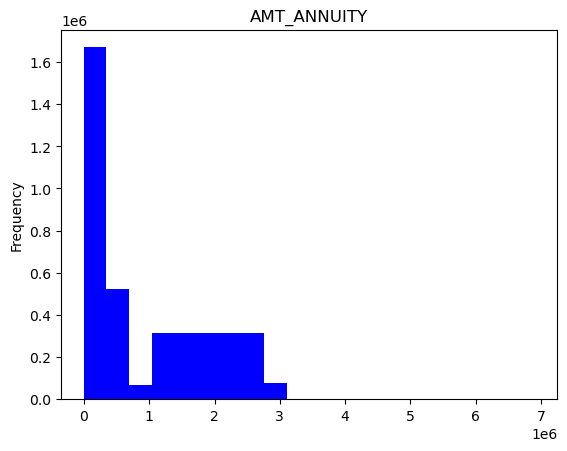

In [125]:
prev_apl_df.plot(kind='hist', x='AMT_ANNUITY', bins=20, color='b', legend=False, xlabel = 'AMT_ANNUITY')
plt.title('AMT_ANNUITY')

### NOTE: 
the hist plot of AMT_ANNUITY doesn't show any clear trend of  Gaussian curve so there is no clear way that I am able to decide how to deal with null values in AMT_ANNUITY. hence I am also dropping this column.

In [126]:
prev_apl_df.drop('AMT_ANNUITY', axis=1, inplace=True)

<AxesSubplot: ylabel='Frequency'>

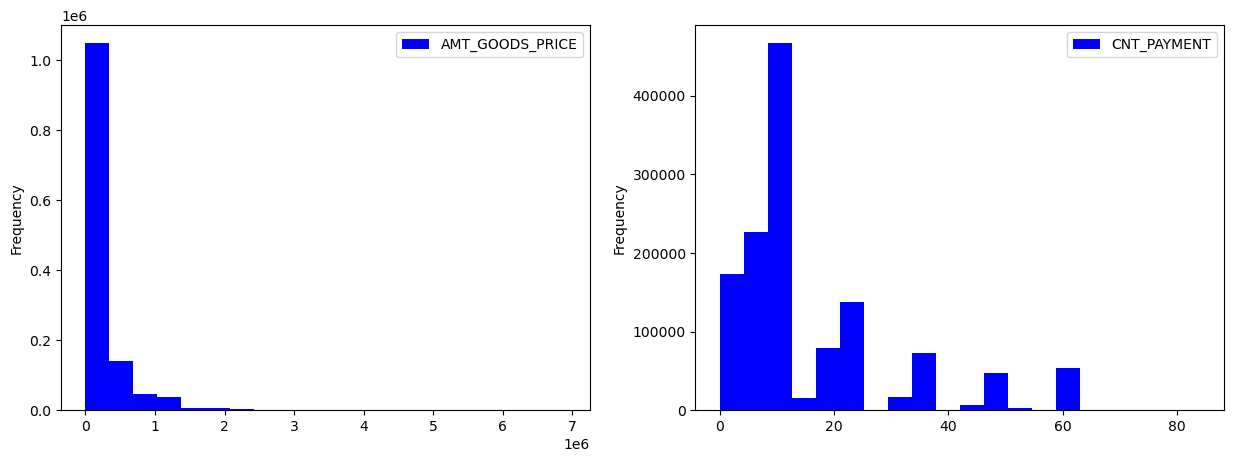

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
prev_apl_df.plot(kind='hist', y='AMT_GOODS_PRICE', bins=20, color='b', legend=True, ax=axes[0])
prev_apl_df.plot(kind='hist', y='CNT_PAYMENT', bins=20, color='b', legend=True, ax=axes[1])

### NOTE:
since a similar kind of trend is observed in case of AMT_GOODS_PRICE and CNT_PAYMENT, as in case of AMT_ANNUITY, we are going to drop these two columns as well

In [128]:
prev_apl_df.drop(['AMT_GOODS_PRICE', 'CNT_PAYMENT'], axis=1, inplace=True)

In [129]:
prev_apl_df.shape

(1670214, 14)

In [130]:
prev_apl_df.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
FLAG_LAST_APPL_PER_CONTRACT      0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [131]:
obj_type = [col for col in prev_apl_df.columns if prev_apl_df[col].dtypes=='object']

In [132]:
obj_type

['NAME_CONTRACT_TYPE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [133]:
for col in obj_type:
    print(col)
    print()
    print(prev_apl_df[col].value_counts())
    print()

NAME_CONTRACT_TYPE

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

FLAG_LAST_APPL_PER_CONTRACT

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

NAME_CONTRACT_STATUS

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

NAME_PAYMENT_TYPE

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

CODE_REJECT_REASON

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

NAME_CLIENT_TYPE

Repeater     1231261
New           301363
Refreshed     135649

### NOTE:
there are 'XNA' and 'XAP' in the columns that need to be adressed

# Handling 'XNA' and 'XAP' values

In [134]:
prev_apl_df = prev_apl_df.replace(['XAP', 'XNA'], np.NaN)

In [135]:
obj_type = [col for col in prev_apl_df.columns if prev_apl_df[col].dtypes=='object']

In [136]:
for col in obj_type:
    print(col)
    print()
    print(prev_apl_df[col].value_counts(dropna = False))
    print()

NAME_CONTRACT_TYPE

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
NaN                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

FLAG_LAST_APPL_PER_CONTRACT

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

NAME_CONTRACT_STATUS

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

NAME_PAYMENT_TYPE

Cash through the bank                        1033552
NaN                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

CODE_REJECT_REASON

NaN       1358337
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

NAME_CLIENT_TYPE

Repeater     1231261
New           301363
Refreshed     135649
NaN             1

Text(0.5, 1.0, 'plot-9')

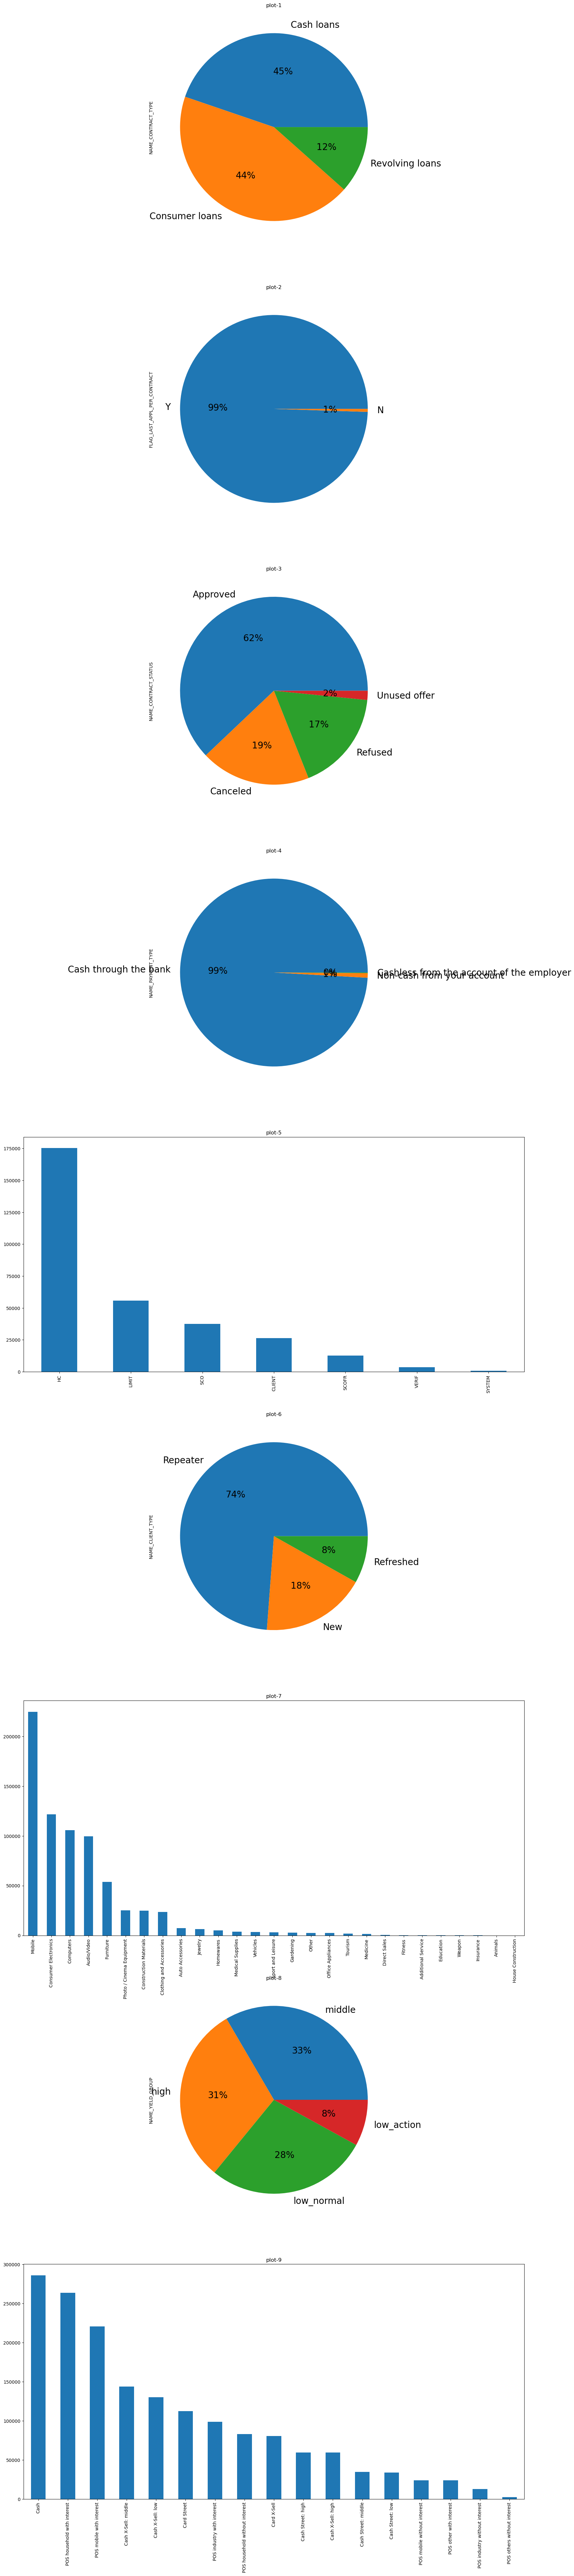

In [137]:
plt.figure(figsize=[20,100])
plt.subplot(9,1,1)
prev_apl_df['NAME_CONTRACT_TYPE'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', fontsize = 20)
plt.title('plot-1')
plt.subplot(9,1,2)
prev_apl_df['FLAG_LAST_APPL_PER_CONTRACT'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', fontsize = 20)
plt.title('plot-2')
plt.subplot(9,1,3)
prev_apl_df['NAME_CONTRACT_STATUS'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', fontsize = 20)
plt.title('plot-3')
plt.subplot(9,1,4)
prev_apl_df['NAME_PAYMENT_TYPE'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', fontsize = 20)
plt.title('plot-4')
plt.subplot(9,1,5)
prev_apl_df['CODE_REJECT_REASON'].value_counts().plot(kind = 'bar')
plt.title('plot-5')
plt.subplot(9,1,6)
prev_apl_df['NAME_CLIENT_TYPE'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', fontsize = 20)
plt.title('plot-6')
plt.subplot(9,1,7)
prev_apl_df['NAME_GOODS_CATEGORY'].value_counts().plot(kind = 'bar')
plt.title('plot-7')
plt.subplot(9,1,8)
prev_apl_df['NAME_YIELD_GROUP'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', fontsize = 20)
plt.title('plot-8')
plt.subplot(9,1,9)
prev_apl_df['PRODUCT_COMBINATION'].value_counts().plot(kind = 'bar')
plt.title('plot-9')

### NOTE: inferences from above plots
* plot-1: % of cash loans > consumer loans> revolving loans
* plot-2: FLAG_LAST_APPL_PER_CONTRACT is too unbalanced data and can be dropped
* plot-3: NAME_CONTRACT_STATUS - 62% of clients had their previous applications approved
* plot-4: NAME_PAYMENT_TYPE  is also too unbalanced and can be dropped
* plot-5: it shows that major reason for rejection is HC
* plot-6: shows that most of the clients are repeters.
* plot-7: shows that most of the loans applied were taken for Mobile goods category
* plot-8: shows that most of the interest rates were middle interest rate.
* plot-9: shows most wide product combination is delt in Cash.

In [138]:
# after previous analysis, we can drop some more columns that are unnecessary
prev_apl_df.drop(['FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE'], axis=1, inplace=True)

In [139]:
prev_apl_df.shape

(1670214, 11)

# Combining Dataset:

In [140]:
# joining two datasets on SK_ID_CURR
comb_data = pd.merge(left=apl_df, right=prev_apl_df, on='SK_ID_CURR', how='inner')

In [141]:
comb_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1           Cash loans           M               Y   
1      100003       0           Cash loans           F               N   
2      100003       0           Cash loans           F               N   
3      100003       0           Cash loans           F               N   
4      100004       0      Revolving loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0      406597.5      24700.5         351000.0   
1             0          270000.0     1293502.5      35698.5        1129500.0   
2             0          270000.0     1293502.5      35698.5        1129500.0   
3             0          270000.0     1293502.5      35698.5        1129500.0   
4             0           67500.0      135000.0       6750.0         135000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0   Unaccompanied          Working                    0.018801        9461   
1          Family    State servant                    0.003541       16765   
2          Family    State servant                    0.003541       16765   
3          Family    State servant                    0.003541       16765   
4   Unaccompanied          Working                    0.010032       19046   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL  \
0            637             3648.0             2120          Y   
1           1188             1186.0              291          Y   
2           1188             1186.0              291          Y   
3           1188             1186.0              291          Y   
4            225             4260.0             2531          Y   

  FLAG_EMP_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0              Y        Laborers              1.0                     2   
1              Y      Core staff              2.0                     1   
2              Y      Core staff              2.0                     1   
3              Y      Core staff              2.0                     1   
4              Y        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            1                     MONDAY   
3                            1                     MONDAY   
4                            2                     MONDAY   

   HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION  \
0                       10                          N   
1                       11                          N   
2                       11                          N   
3                       11                          N   
4                        9                          N   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          N                           N   
1                          N                           N   
2                          N                           N   
3                          N                           N   
4                          N                           N   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      N                      N                       N   
1                      N                      N                       N   
2                      N                      N                       N   
3                      N                      N                       N   
4                      N                      N                       N   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                       2.0                       2.0   
1                  School                       1.0             

In [142]:
comb_data.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE_x            0.000000
CODE_GENDER                     0.003890
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT_x                    0.000000
AMT_ANNUITY                     0.006578
AMT_GOODS_PRICE                 0.085449
NAME_TYPE_SUITE                 0.249416
NAME_INCOME_TYPE                0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
OCCUPATION_TYPE                 0.000000
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCES

NAME_GOODS_CATEGORY, NAME_YIELD_GROUP, CODE_REJECT_REASON are having lot of missing values in the combined dataset. but we can't delete CODE_REJECT_REASON as it is one of the most important attribute in analysing whether a applicant is turning out to be a defaulter or not. so we will drop NAME_GOODS_CATEGORY, NAME_YIELD_GROUP columns.

# Handling columns with large % of missing values in the merged dataset

In [143]:
comb_data.drop(['NAME_YIELD_GROUP', 'NAME_GOODS_CATEGORY'], axis=1, inplace=True)

In [144]:
comb_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY'

In [145]:
# also, we are going to drop few unwanted columns from the combined dataset
unwanted_cols = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_POPULATION_RELATIVE', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START']

In [146]:
comb_data.drop(unwanted_cols, axis=1, inplace=True)

In [147]:
comb_data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1           Cash loans           M               Y   
1      100003       0           Cash loans           F               N   
2      100003       0           Cash loans           F               N   
3      100003       0           Cash loans           F               N   
4      100004       0      Revolving loans           M               Y   
5      100006       0           Cash loans           F               Y   
6      100006       0           Cash loans           F               Y   
7      100006       0           Cash loans           F               Y   
8      100006       0           Cash loans           F               Y   
9      100006       0           Cash loans           F               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0      406597.5      24700.5         351000.0   
1             0          270000.0     1293502.5      35698.5        1129500.0   
2             0          270000.0     1293502.5      35698.5        1129500.0   
3             0          270000.0     1293502.5      35698.5        1129500.0   
4             0           67500.0      135000.0       6750.0         135000.0   
5             0          135000.0      312682.5      29686.5         297000.0   
6             0          135000.0      312682.5      29686.5         297000.0   
7             0          135000.0      312682.5      29686.5         297000.0   
8             0          135000.0      312682.5      29686.5         297000.0   
9             0          135000.0      312682.5      29686.5         297000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0   Unaccompanied          Working        9461            637   
1          Family    State servant       16765           1188   
2          Family    State servant       16765           1188   
3          Family    State servant       16765           1188   
4   Unaccompanied          Working       19046            225   
5   Unaccompanied          Working       19005           3039   
6   Unaccompanied          Working       19005           3039   
7   Unaccompanied          Working       19005           3039   
8   Unaccompanied          Working       19005           3039   
9   Unaccompanied          Working       19005           3039   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             1186.0              291      Core staff              2.0   
3             1186.0              291      Core staff              2.0   
4             4260.0             2531        Laborers              1.0   
5             9833.0             2437        Laborers              2.0   
6             9833.0             2437        Laborers              2.0   
7             9833.0             2437        Laborers              2.0   
8             9833.0             2437        Laborers              2.0   
9             9833.0             2437        Laborers              2.0   

        ORGANIZATION_TYPE      Education type     Family_info Housing_type  \
0  Business Entity Type 3   secondary special      Un-Married     Own-home   
1                  School    Higher education         Married     Own-home   
2                  School    Higher education         Married     Own-home   
3                  School    Higher education         Married     Own-home   
4              Government   secondary special      Un-Married     Own-home   
5  Business Entity Type 3   secondary special  Civil marriage     Own-home   
6  Business Entity Type 3   secondary special  Civil marriage     Own-home   
7  Business Entity Type 3   secondary special  Civil marriage     Own-home   
8  Business Entity Type 3   secondary special  Civil marriage  

In [148]:
comb_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'Education type', 'Family_info', 'Housing_type', 'Income_range',
       'Credit_amt_range', 'Goods_price_range', 'age_in_years', 'age_group',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y',
       'DAYS_DECISION', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'PRODUCT_COMBINATION'],
      dtype='object')

# dividing final data into two separate data

In [149]:
Defaulters = comb_data[comb_data['TARGET']==1]
Repayers = comb_data[comb_data['TARGET']==0]

In [150]:
client_personal_info = ['CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Education type', 'Family_info', 'Housing_type', 'Income_range', 'age_group']

# Univariate analysis of Merged dataset

Text(0.5, 1.0, 'age_group')

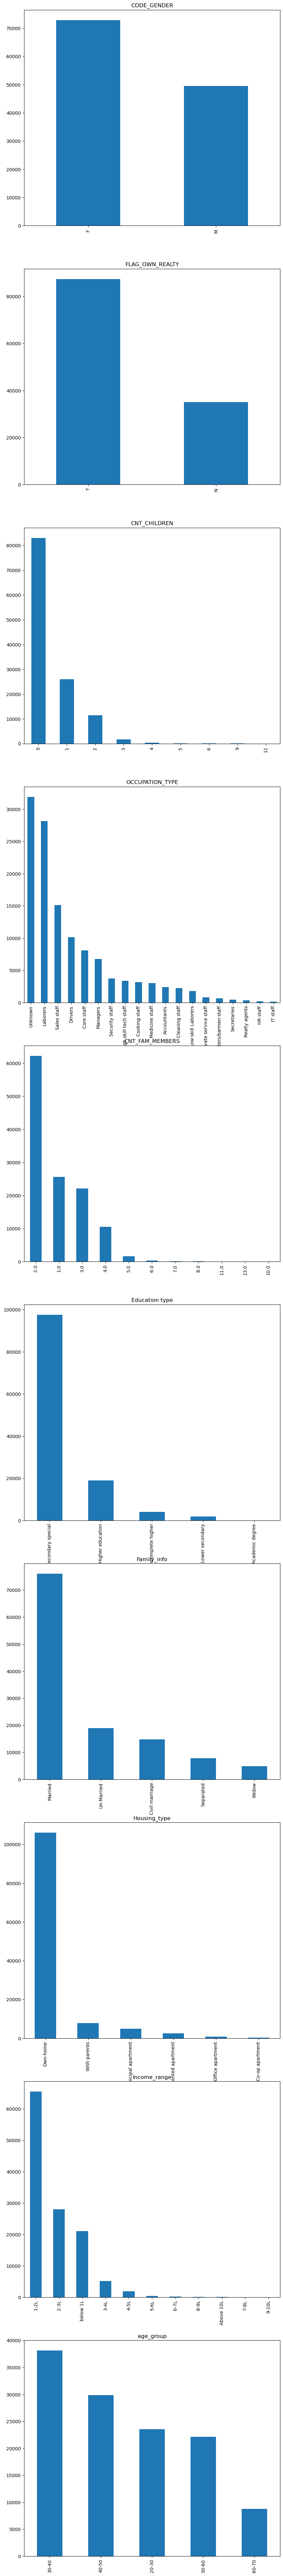

In [151]:
plt.figure(figsize=[10,100])
plt.subplot(10,1,1)
Defaulters['CODE_GENDER'].value_counts().plot(kind='bar')
plt.title('CODE_GENDER')
plt.subplot(10,1,2)
Defaulters['FLAG_OWN_REALTY'].value_counts().plot(kind='bar')
plt.title('FLAG_OWN_REALTY')
plt.subplot(10,1,3)
Defaulters['CNT_CHILDREN'].value_counts().plot(kind='bar')
plt.title('CNT_CHILDREN')
plt.subplot(10,1,4)
Defaulters['OCCUPATION_TYPE'].value_counts().plot(kind='bar')
plt.title('OCCUPATION_TYPE')
plt.subplot(10,1,5)
Defaulters['CNT_FAM_MEMBERS'].value_counts().plot(kind='bar')
plt.title('CNT_FAM_MEMBERS')
plt.subplot(10,1,6)
Defaulters['Education type'].value_counts().plot(kind='bar')
plt.title('Education type')
plt.subplot(10,1,7)
Defaulters['Family_info'].value_counts().plot(kind='bar')
plt.title('Family_info')
plt.subplot(10,1,8)
Defaulters['Housing_type'].value_counts().plot(kind='bar')
plt.title('Housing_type')
plt.subplot(10,1,9)
Defaulters['Income_range'].value_counts().plot(kind='bar')
plt.title('Income_range')
plt.subplot(10,1,10)
Defaulters['age_group'].value_counts().plot(kind='bar')
plt.title('age_group')

### NOTE: inferences from the above plots
* plot-1: females are more defaulters than male
* plot-2: it can be observed than people with own real-estate property are likely defaulters
* plot-3: clients with childern count=0 are likely to be defaulters
* plot-4: clients whose occupation types are unknown are likely to be defaulters. of those who specified their jobs, Labourers are likely to default 
* plot-5: clients with 2 family members are more likely to be defaulters.
* plot-6: clients with secondary - special education are likely defaulters
* plot-7: Married clients are likely to be defaulters
* plot-8: clients with Own-home are turning out to be defaulters
* plot-9: clients with income range in 1-2L are likely to be defaulters.
* plot-10: clients within 30-40 years age-group are likely to be defaulters.

Text(0.5, 1.0, 'age_group')

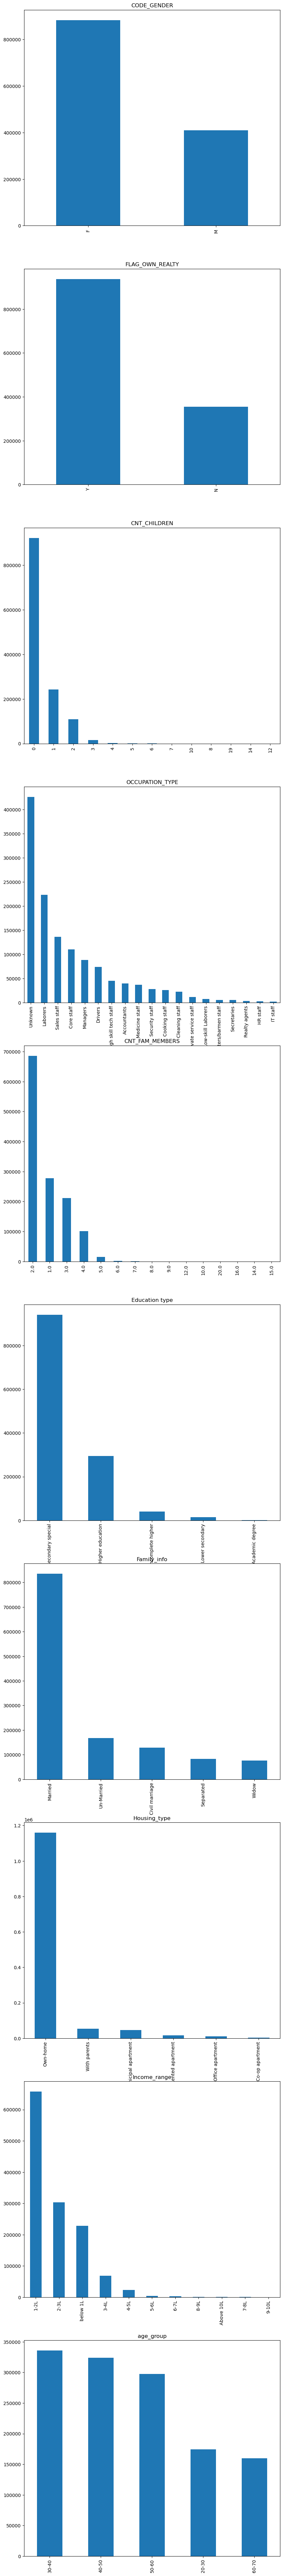

In [152]:
plt.figure(figsize=[10,100])
plt.subplot(10,1,1)
Repayers['CODE_GENDER'].value_counts().plot(kind='bar')
plt.title('CODE_GENDER')
plt.subplot(10,1,2)
Repayers['FLAG_OWN_REALTY'].value_counts().plot(kind='bar')
plt.title('FLAG_OWN_REALTY')
plt.subplot(10,1,3)
Repayers['CNT_CHILDREN'].value_counts().plot(kind='bar')
plt.title('CNT_CHILDREN')
plt.subplot(10,1,4)
Repayers['OCCUPATION_TYPE'].value_counts().plot(kind='bar')
plt.title('OCCUPATION_TYPE')
plt.subplot(10,1,5)
Repayers['CNT_FAM_MEMBERS'].value_counts().plot(kind='bar')
plt.title('CNT_FAM_MEMBERS')
plt.subplot(10,1,6)
Repayers['Education type'].value_counts().plot(kind='bar')
plt.title('Education type')
plt.subplot(10,1,7)
Repayers['Family_info'].value_counts().plot(kind='bar')
plt.title('Family_info')
plt.subplot(10,1,8)
Repayers['Housing_type'].value_counts().plot(kind='bar')
plt.title('Housing_type')
plt.subplot(10,1,9)
Repayers['Income_range'].value_counts().plot(kind='bar')
plt.title('Income_range')
plt.subplot(10,1,10)
Repayers['age_group'].value_counts().plot(kind='bar')
plt.title('age_group')

In [153]:
other_attributes = ['NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y', 'Credit_amt_range', 'Annuity_range', 'Goods_price_range', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'PRODUCT_COMBINATION']

In [154]:
len(other_attributes)

8

Text(0.5, 1.0, 'plt-8: PRODUCT_COMBINATION')

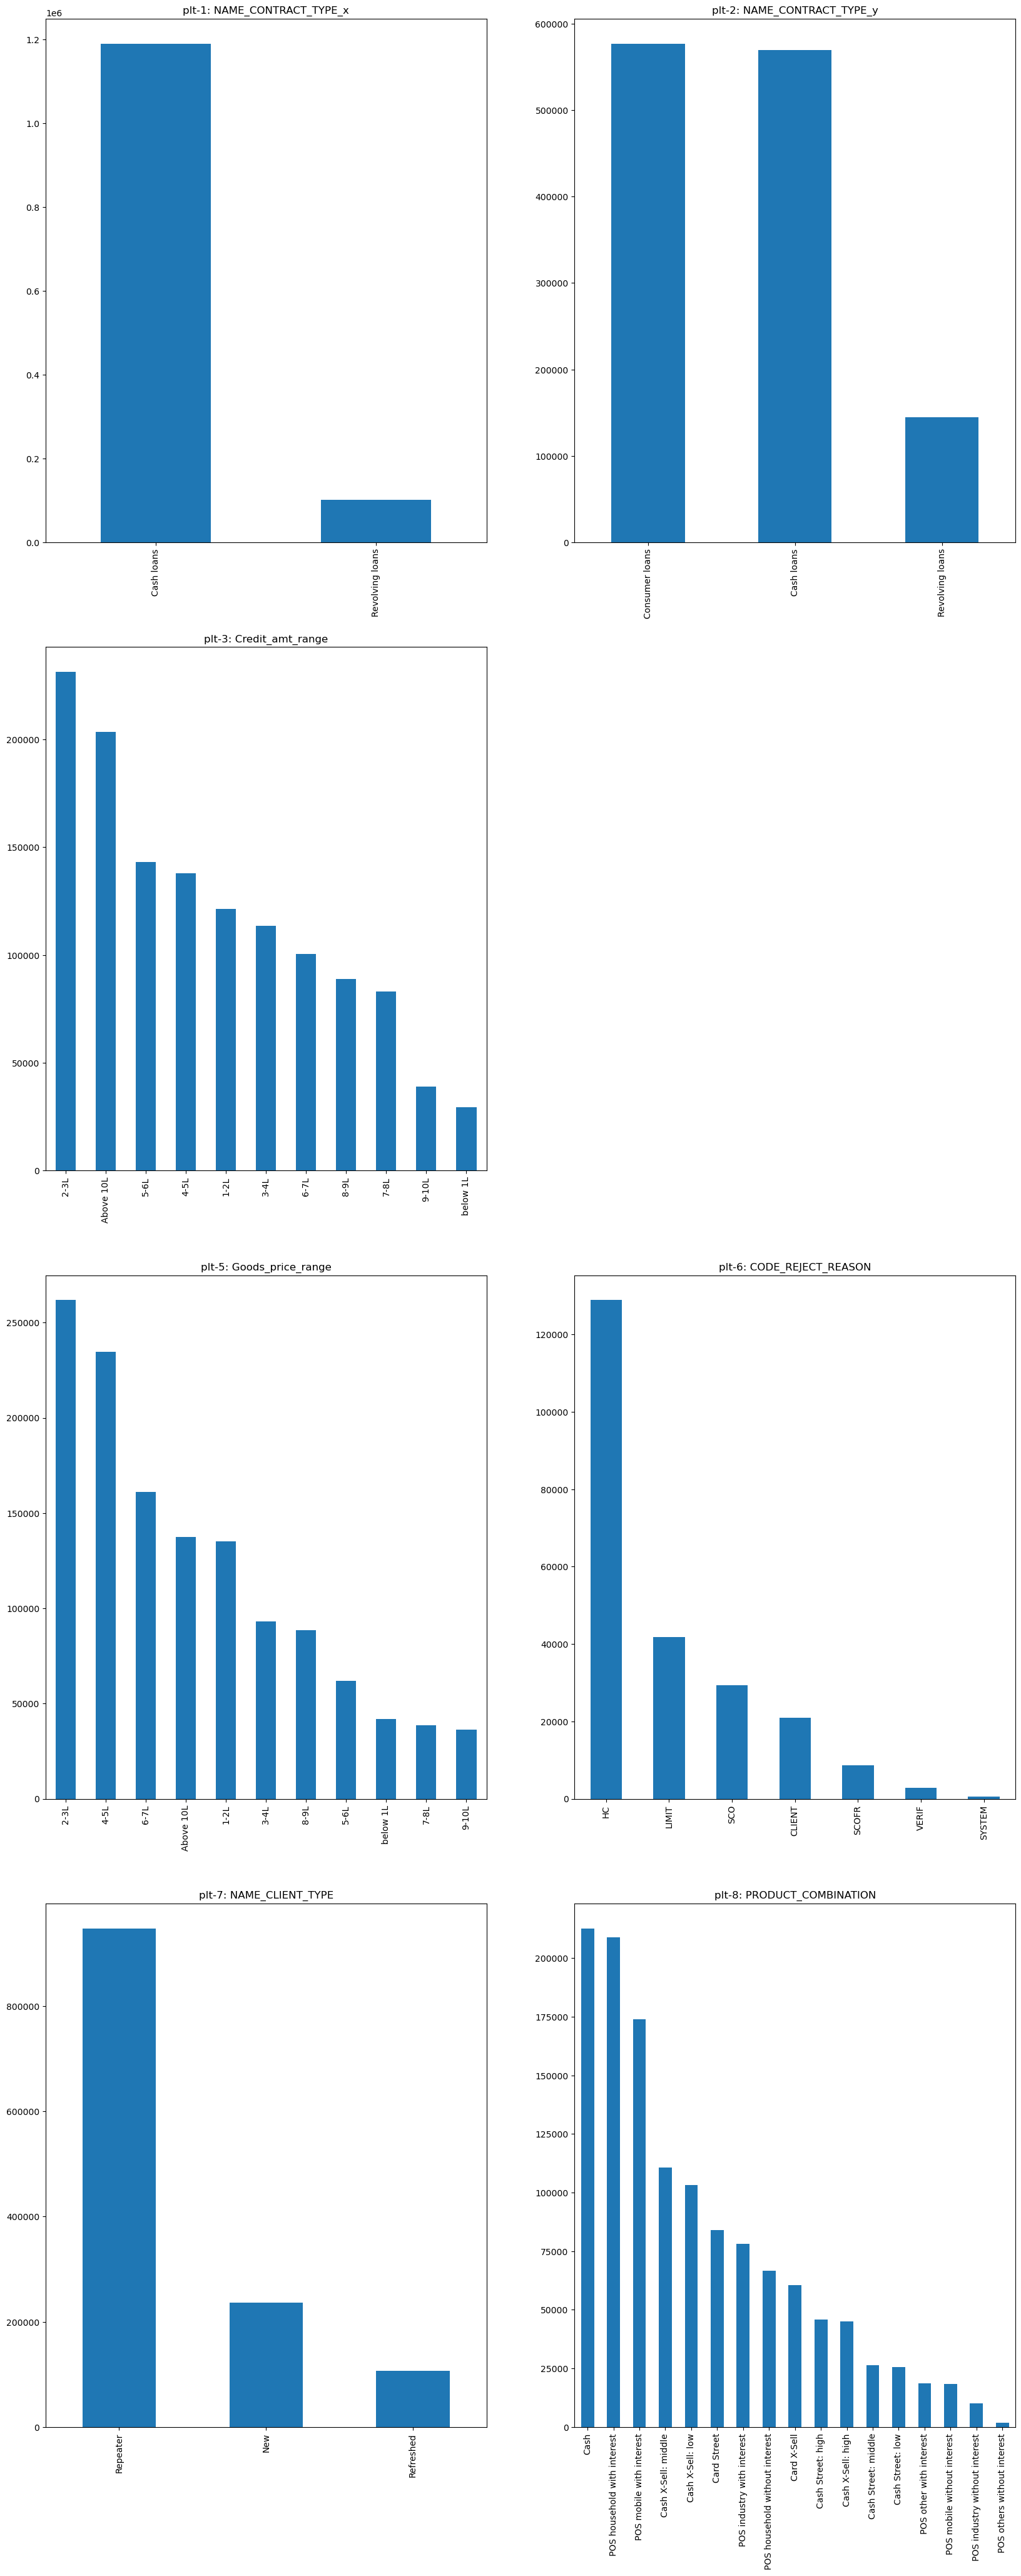

In [155]:
plt.figure(figsize=[20,50])
plt.subplot(4,2,1)
Repayers['NAME_CONTRACT_TYPE_x'].value_counts().plot(kind='bar')
plt.title('plt-1: NAME_CONTRACT_TYPE_x')
plt.subplot(4,2,2)
Repayers['NAME_CONTRACT_TYPE_y'].value_counts().plot(kind='bar')
plt.title('plt-2: NAME_CONTRACT_TYPE_y')
plt.subplot(4,2,3)
Repayers['Credit_amt_range'].value_counts().plot(kind='bar')
plt.title('plt-3: Credit_amt_range')
plt.subplot(4,2,5)
Repayers['Goods_price_range'].value_counts().plot(kind='bar')
plt.title('plt-5: Goods_price_range')
plt.subplot(4,2,6)
Repayers['CODE_REJECT_REASON'].value_counts().plot(kind='bar')
plt.title('plt-6: CODE_REJECT_REASON')
plt.subplot(4,2,7)
Repayers['NAME_CLIENT_TYPE'].value_counts().plot(kind='bar')
plt.title('plt-7: NAME_CLIENT_TYPE')
plt.subplot(4,2,8)
Repayers['PRODUCT_COMBINATION'].value_counts().plot(kind='bar')
plt.title('plt-8: PRODUCT_COMBINATION')

### NOTE: inferences from the above plots
* plot-1: clients opting cash loans are likely repayers
* plot-2: clients who took consumer loans earlier are likely repayers
* plot-3: credit amount in the range 2-3L are likely repayers
* plot-5: goods for which loan is taken in the range 2-3L are likely repayers
* plot-6: Code rejected because of HC are likely repayers
* plot-7: repeat loan seekers are likely repayers
* plot-8: product_combination (cash) are likely repayers

# Bivariate and Multivariate analysis of merged dataset

In [156]:
comb_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'Education type', 'Family_info', 'Housing_type', 'Income_range',
       'Credit_amt_range', 'Goods_price_range', 'age_in_years', 'age_group',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y',
       'DAYS_DECISION', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [157]:
def multi_plot(var1,var2):
    plt.style.use('ggplot')
    sns.despine
    a = comb_data.pivot_table(values='SK_ID_CURR', index=var1,columns=var2,aggfunc='count')
    a = a.div(a.sum(axis=1),axis='rows')*100
    sns.set()
    a.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {var1} on Loan Approval')
    plt.xlabel(f'{var1}')
    plt.ylabel(f'{var2}%')
    plt.show()

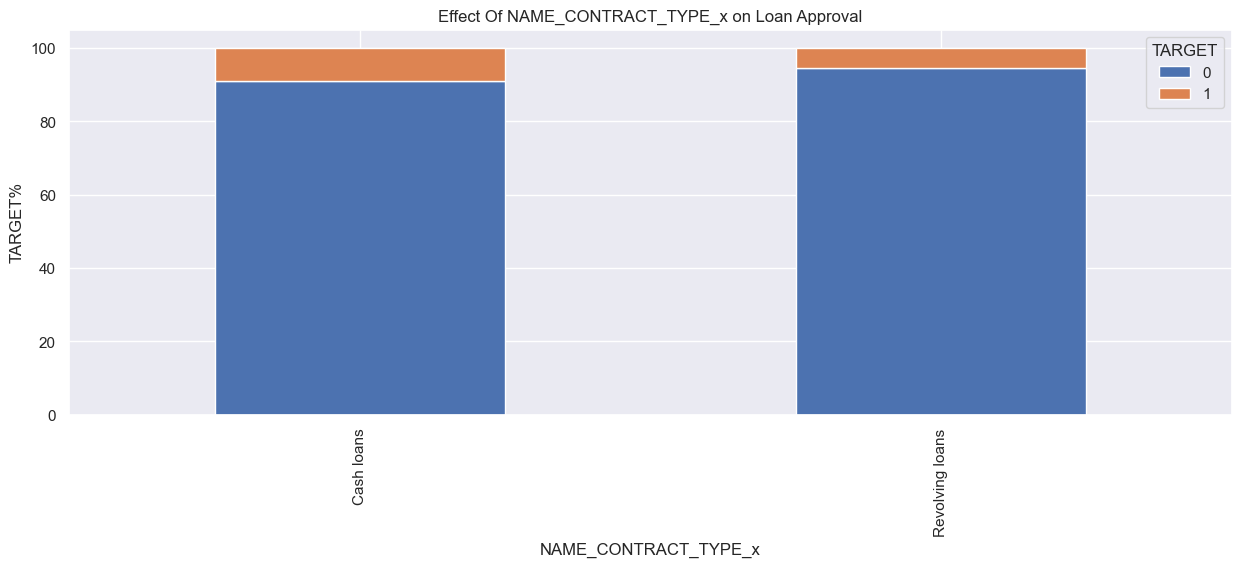

In [158]:
# short_listing some important attributes that I think are having significant effect on Target variable and plotting them
multi_plot('NAME_CONTRACT_TYPE_x','TARGET')

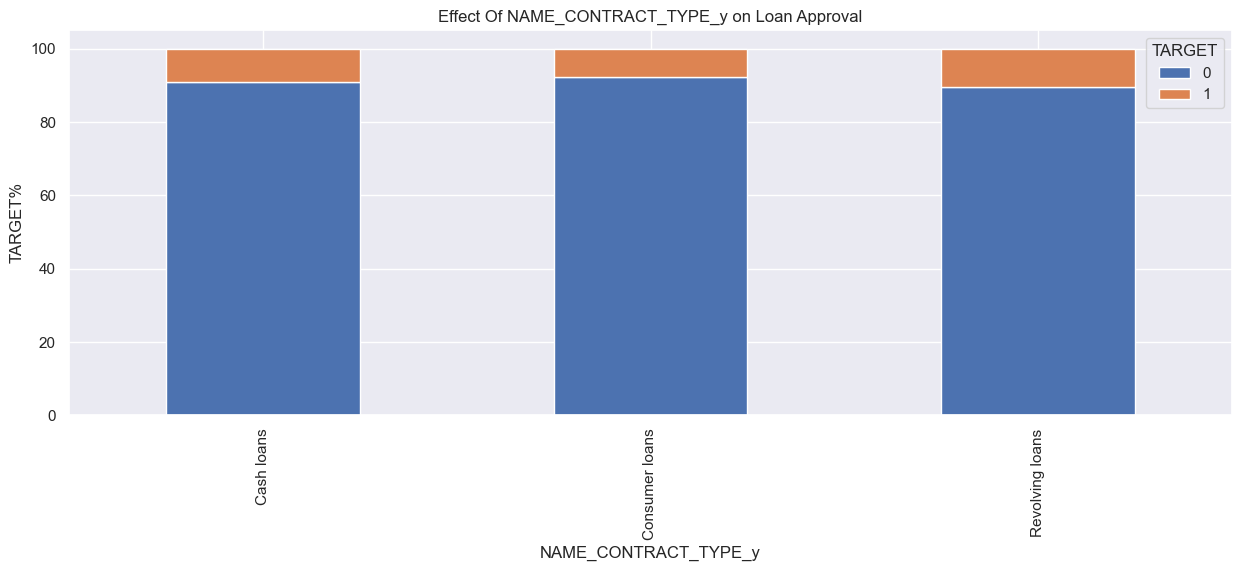

In [159]:
multi_plot('NAME_CONTRACT_TYPE_y','TARGET')

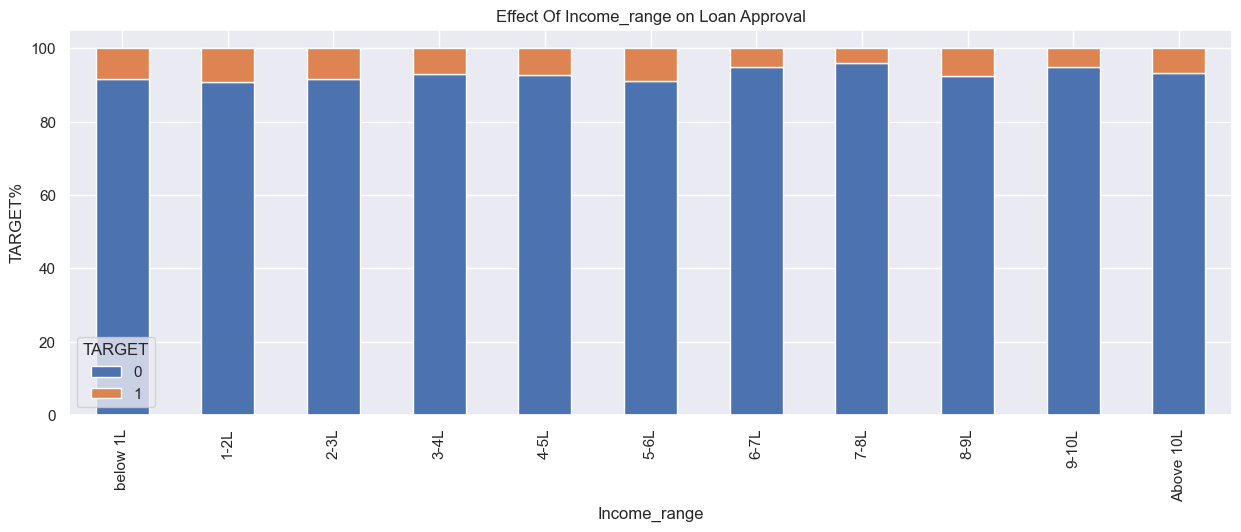

In [160]:
multi_plot('Income_range','TARGET')

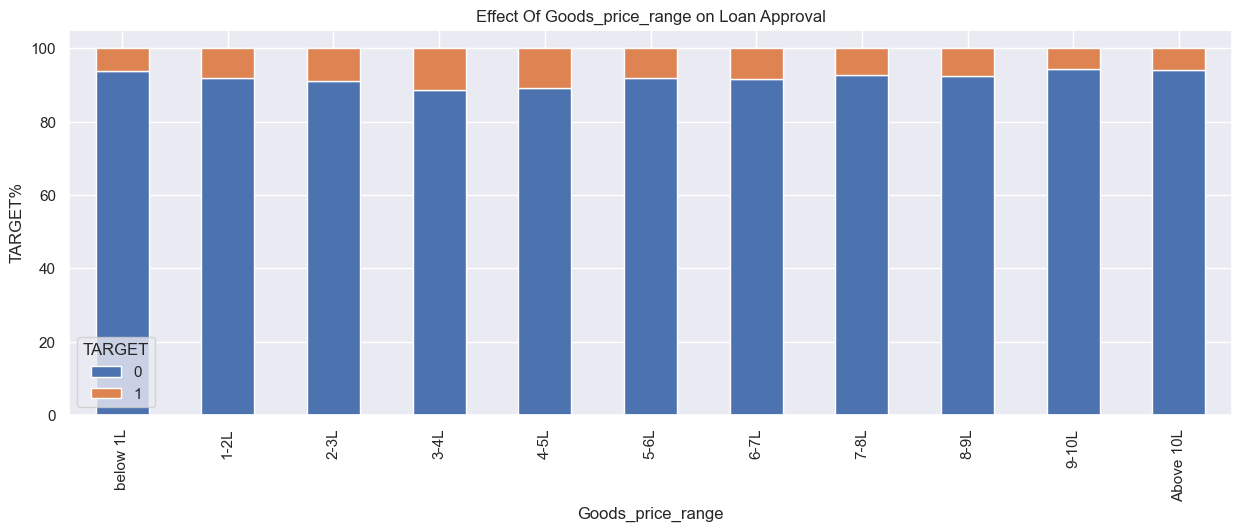

In [161]:
multi_plot('Goods_price_range','TARGET')

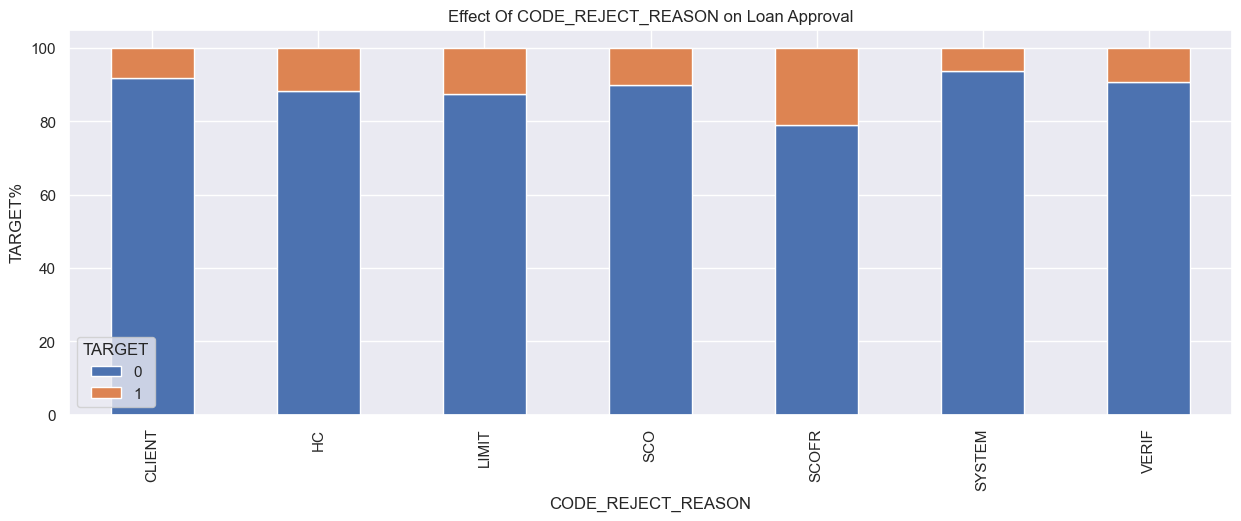

In [162]:
multi_plot('CODE_REJECT_REASON','TARGET')

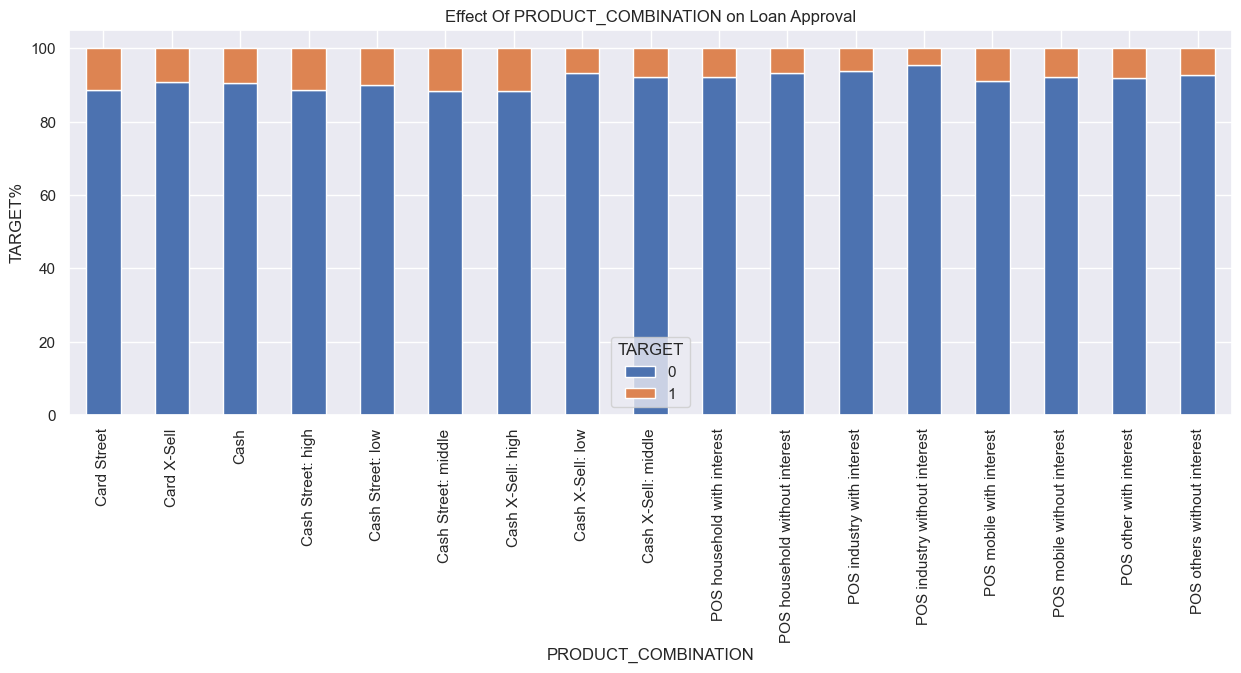

In [163]:
multi_plot('PRODUCT_COMBINATION', 'TARGET')

### NOTE: as far as my understanding of the data set from the entire analysis is concerned, the factors that effect the loan approval for any appliant is driven by following attributes that greatly effect the target variable
* NAME_CONTRACT_TYPE_x
* NAME_CONTRACT_TYPE_y
* Income_range of client
* Goods_price_range for which the loan is being taken
* Reject reason for the previous loan
* Product combination of the client

# -----THE END----